# Credit EDA CASE STUDY  - DATA ANALYSIS

**Subject**:  
    If a client has difficulty paying their installments which may be used for taking actions such as denying the loan, 
    reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that 
    the consumers capable of repaying the loan are not rejected.

**Business objective**:                                                                                     
 The aim of this analysis is to find the trend of borrowers who are likely to default and non-default.
 
**Input files used**:  
    1. **application_data.csv**  contains all the information of the client at the time of application.
    The data is about whether a client has payment difficulties. 
    2. **previous_application.csv** contains information about the client’s previous loan data. 
    It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer. 
    

**The analysis on application.csv is divided into below main parts**:
1. Data Loading and Understanding different columns.
2. Data cleaning which includes cleaning missing (Null, NA) values, checking & removing redundant columns etc.
3. Data Analysis.
4. Univariate Analysis + Conclusion.
5. Bivariate Analysis  + Conclusion.
6. Correlation of Numerical variables  + Conclusion.

**The analysis on previous_application.csv includes**:
1. Data Loading and Understanding different columns.
2. Data cleaning which includes cleaning missing (Null, NA) values, checking & removing redundant columns etc.

**Merging of application_data.csv and previous_application.csv dataframes- merged_data (new dataframe).**

3. Data Analysis.
4. Univariate Analysis + Conclusion.
5. Bivariate Analysis  + Conclusion.
6. Final Conclusion.

In [1]:
# Importing all the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Data Loading and Understanding

# Loading the application.csv dataset.
application_data = pd.read_csv("application_data.csv")
application_data.info()

# Setting the option to display specified number of rows and columns.
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 122)

# Printing all column names
print(application_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


Total columns count is 122. Some of the important columns in the dataset are- TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,
AMT_ANNUITY, 'REGION_POPULATION_RELATIVE, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE  etc.

Days past due is an important measure for lenders to assess the creditworthiness and risk associated with a borrower.

# Data Cleaning

1. Find out which all columns are having null/NaN values and if all these columns are not under analysis then drop them as they don't give any insight.
2. Drop the columns which are not relevant in this Credit EDA Case Study.

In [3]:
# Checking the percentage of missing values in each column.
print(round(application_data.isnull().sum() * 100 / len(application_data.index), 2).to_string())

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### **There are columns with 69%, 68%, 59% 49%. First, let's drop all the columns having more than 45% of missing values.**

In [4]:
# Checking the columns having more than 45% missing values
columns_45_greater = application_data.columns[
    100 * (application_data.isnull().sum() / len(application_data.index)) > 45]

# Dropping the columns which has more than 45% null values.
application_data = application_data.drop(columns_45_greater, axis=1)

# Rows and Columns now:
print(application_data.shape) 

# Checking the percentage of missing values in each column again.
for each in application_data.columns:
    # Finding null value count percentage for each column.
    per_column_null_count = round(100 * application_data[each].isnull().sum() / len(application_data[each].index), 2)
    if per_column_null_count !=0.0:
        print(each,"=",per_column_null_count)

(307511, 73)
AMT_GOODS_PRICE = 0.09
NAME_TYPE_SUITE = 0.42
OCCUPATION_TYPE = 31.35
EXT_SOURCE_2 = 0.21
EXT_SOURCE_3 = 19.83
OBS_30_CNT_SOCIAL_CIRCLE = 0.33
DEF_30_CNT_SOCIAL_CIRCLE = 0.33
OBS_60_CNT_SOCIAL_CIRCLE = 0.33
DEF_60_CNT_SOCIAL_CIRCLE = 0.33
AMT_REQ_CREDIT_BUREAU_HOUR = 13.5
AMT_REQ_CREDIT_BUREAU_DAY = 13.5
AMT_REQ_CREDIT_BUREAU_WEEK = 13.5
AMT_REQ_CREDIT_BUREAU_MON = 13.5
AMT_REQ_CREDIT_BUREAU_QRT = 13.5
AMT_REQ_CREDIT_BUREAU_YEAR = 13.5


The null count percentage is very less and we are good to proceed without droping these columns. However, 
later we are handling and will impute the missing values.

***FLAG DOCUMENT columns***:

In [5]:
# There are many columns which shows whether Clients has provided specific document or not. We can concatenate all those
# columns and see how many people has provided 0 documents, at least 1 document, 2 documents and so.

# Adding a new column and will drop the individual ones.

application_data['FLAG_DOCUMENTS'] = application_data['FLAG_DOCUMENT_21'] + application_data['FLAG_DOCUMENT_20'] + \
                                     application_data['FLAG_DOCUMENT_19'] + application_data['FLAG_DOCUMENT_18'] + \
                                     application_data['FLAG_DOCUMENT_17'] + \
                                     application_data['FLAG_DOCUMENT_16'] + application_data['FLAG_DOCUMENT_15'] + \
                                     application_data['FLAG_DOCUMENT_14'] + \
                                     application_data['FLAG_DOCUMENT_13'] + application_data['FLAG_DOCUMENT_12'] + \
                                     application_data['FLAG_DOCUMENT_11'] + \
                                     application_data['FLAG_DOCUMENT_10'] + application_data['FLAG_DOCUMENT_9'] + \
                                     application_data['FLAG_DOCUMENT_8'] + \
                                     application_data['FLAG_DOCUMENT_7'] + application_data['FLAG_DOCUMENT_6'] + \
                                     application_data['FLAG_DOCUMENT_5'] + \
                                     application_data['FLAG_DOCUMENT_4'] + application_data['FLAG_DOCUMENT_3'] + \
                                     application_data['FLAG_DOCUMENT_2']

print(application_data['FLAG_DOCUMENTS'].value_counts(normalize=True))

1    0.878199
0    0.096091
2    0.025176
3    0.000530
4    0.000003
Name: FLAG_DOCUMENTS, dtype: float64


***AMT_REQ_CREDIT Columns***

There are many columns which shows info about number of enquiries to Credit Bureau about the client at different
points of time before application- 1 hour, a week, an year etc.

All these columns provides insights into the borrower's recent credit-seeking behavior and potential financial risk.
If there is a high number of credit enquiries, it might indicate an increased likelihood of the borrower seeking
credit from multiple sources, which could be seen as a higher risk by the lender.

In [6]:
# We can concatenate all these columns and make 1 new column which can tells us whether or not customer is making
# enquiries.

# Adding a new column and will drop the individual ones.

application_data['AMT_REQ_CREDIT'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] + \
                                     application_data['AMT_REQ_CREDIT_BUREAU_DAY'] + \
                                     application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] + \
                                     application_data['AMT_REQ_CREDIT_BUREAU_MON'] + \
                                     application_data['AMT_REQ_CREDIT_BUREAU_QRT'] + \
                                     application_data['AMT_REQ_CREDIT_BUREAU_YEAR']

print(application_data['AMT_REQ_CREDIT'].value_counts(normalize=True))

1.0      0.202690
2.0      0.193837
0.0      0.191400
3.0      0.148050
4.0      0.102413
5.0      0.064844
6.0      0.040509
7.0      0.024166
8.0      0.014414
9.0      0.008545
10.0     0.003966
11.0     0.001921
12.0     0.001049
13.0     0.000613
14.0     0.000519
15.0     0.000320
16.0     0.000226
17.0     0.000158
18.0     0.000120
19.0     0.000083
20.0     0.000071
21.0     0.000034
22.0     0.000015
23.0     0.000011
30.0     0.000008
28.0     0.000004
27.0     0.000004
262.0    0.000004
31.0     0.000004
24.0     0.000004
Name: AMT_REQ_CREDIT, dtype: float64


***Other columns which are not significant for this analysis or few columns which could be merged so after merging
we can drop those columns along with few of them have which have around 19% null values and few are insignificant for
analysis.***

In [7]:
columns_to_drop = \
    ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START',
     'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
     'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
     'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
     'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
     'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
     'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE']

application_data.drop(columns_to_drop, axis=1, inplace=True)
print(application_data.shape)  

(307511, 31)


***Lets see if we have more than 5 null values in a row.***

In [8]:
print(len(application_data[application_data.isnull().sum(axis=1) > 5].index))

65


***So around 65 rows have more than 5 missing values out of 307511 which is approximately 0.02% hence we can drop these
rows as it would not result in major data loss.***

In [9]:
rows_to_drop = application_data[application_data.isnull().sum(axis=1) > 5].index

application_data = application_data.drop(rows_to_drop)

print(application_data.shape) 

(307446, 31)


***Let's check if there are any duplicated rows in the dataset.***

In [10]:
print(application_data.duplicated().sum())

0


There are no duplicate rows in the dataset.

***Let's segregate on the basis of variable types. Categorical variable and Numerical/Continuous variable list.***

In [11]:
categorical_vars = []
numerical_vars = []

for each in application_data.columns:
    if application_data[each].dtype == 'int64' or application_data[each].dtype == 'float64':
        numerical_vars.append(each)
    elif application_data[each].dtype == 'object':
        categorical_vars.append(each)

### Imputing Missing values.

 ***For Categorical variable- imputing with mode (the most occurring value).***
 
 ***For Numerical variable- imputing with median (as this is not affected by outlier like mean).***

In [12]:
for each in categorical_vars:
    if application_data[each].isnull().sum != 0:
        mode_each = application_data[each].mode()[0]
        application_data[each] = application_data[each].fillna(mode_each)

for each in numerical_vars:
    if application_data[each].isnull().sum != 0:
        median_each = application_data[each].median()
        application_data[each] = application_data[each].fillna(median_each)

print(application_data.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_CONT_MOBILE               0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
FLAG_DOCUMENTS                 0
AMT_REQ_CR

Now all the Null values has been removed.

***We can further check for columns if any value which is an indicator of null value like - XNA is present or not. 
If present, we can impute it on same basis like above -***

Categorical->Mode.

Numerical->Median.

In [13]:
for each in categorical_vars:
    if 'XNA' in application_data[each].unique():
        mode_each = application_data[each].mode()[0]
        application_data[each] = application_data[each].replace("XNA", mode_each)
        
# Also, for few Numerical columns, Days of Birth, Days Employed, Days Id Publish are having values in negative. So we cantake it's
# absolute value.

for each in numerical_vars:
    if each in 'DAYS_BIRTH' or each in 'DAYS_EMPLOYED' or each in 'DAYS_ID_PUBLISH':
        application_data[each] = abs(application_data[each])


# Data Analysis

Aim is to identify best predictors of default so that at the time of loan application, we can use those predictors (variables) for approval/rejection of the loan. Now, there are broadly followings types of variables - 

1. One which are related to the applicant (demographic variables such as Age, Occupation, CNT_CHILDREN, Employment details etc.)
2. Loan characteristics (Amount of loan, Interest Rate, Purpose of loan etc.)  

Now our complete analysis is based on who has difficulty repaying loan while others. This is best conveyed by Target 
column. 

1. Target is 1 :: Clients having payment difficulties.
2. Target=0 :: Others. When the payment is paid on time.

#### Checking if there is data imbalance.

In [14]:
# Target variable.

print(100 * application_data["TARGET"].value_counts(normalize=True))

# When one of the variable value is dominating than other. Like we can see the Non-defaulters are 92% while defaulters
# are 8% people.

# Checking the target variable imbalance.
len_target0 = len(application_data[application_data["TARGET"] == 0])
len_target1 = len(application_data[application_data["TARGET"] == 1])

print(round(len_target0 / len_target1, 2))

0    91.926387
1     8.073613
Name: TARGET, dtype: float64
11.39


***The Imbalance ratio is 11.39. Hence non-defaulters are 11.39 times the defaulters.***


### Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [15]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

non_defaulter_target0 = application_data[application_data["TARGET"] == 0]

defaulter_target1 = application_data[application_data["TARGET"] == 1]


## TARGET VARIABLE

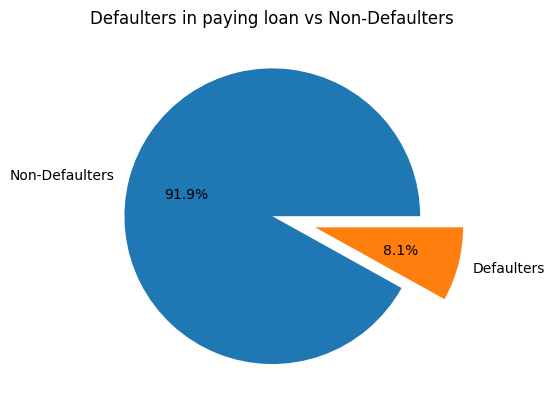

In [16]:
# Let's draw the above findings with the help of pie plot to analyse it better.

plt.pie([len_target0, len_target1], labels=['Non-Defaulters', 'Defaulters'], autopct='%1.1f%%', explode=(0, 0.3))

plt.title("Defaulters in paying loan vs Non-Defaulters")
plt.show()


### Common Shared Methods/Utils For Univariate, Bivariate, Multivariate Analysis.

In [17]:
# Creating a common method for plotting graphs.

def categorical_univariate_countplot(dataframe, column, title, hue=None, palette='cividis'):
    plt.title(title)
    plt.yscale('log')
    sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index, hue=hue,
                  palette=palette)

    plt.show()

def numerical_univariate_boxplot(dataframe, column, title):
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=dataframe, y=column, orient='v')

    plt.show()

def bivariate_boxplot(dataframe, column_x, column_y, title, hue=None):
    plt.title(title)
    plt.yscale('log')
    plt.xticks(rotation=90)
    sns.boxplot(data=dataframe, x=column_x, y=column_y, hue=hue)
    plt.show()

def bivariate_barplot(dataframe, column_x, column_y, title, hue=None):
    plt.title(title)
    sns.barplot(data=dataframe, x=column_x, y=column_y, hue=hue)
    plt.show()

def multivariate_heatmap(dataframe, cmap, title):
    plt.title(title + "\n")
    plt.xticks(rotation=60)
    plt.yticks(rotation=60)
    sns.heatmap(dataframe, cmap=cmap, annot=True)
    plt.show()

## Target=0, clients with no payment difficulties.

### Categorical Univariate analysis

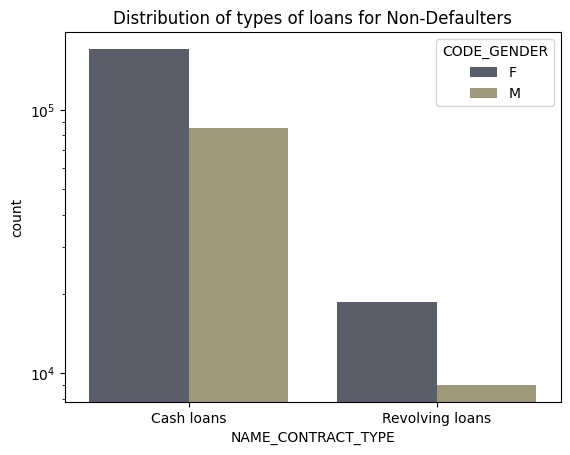

In [18]:
# 1. NAME_CONTRACT_TYPE: Types of loan.

categorical_univariate_countplot(non_defaulter_target0, column='NAME_CONTRACT_TYPE',
                                 title='Distribution of types of loans for Non-Defaulters', hue='CODE_GENDER')

Conclusion drawn from above graph:

1. Name Contract Type, it is evident that more payments are received in case of 'Cash loans' than 'Revolving loans'.
2. Females are ahead of men in providing credits.

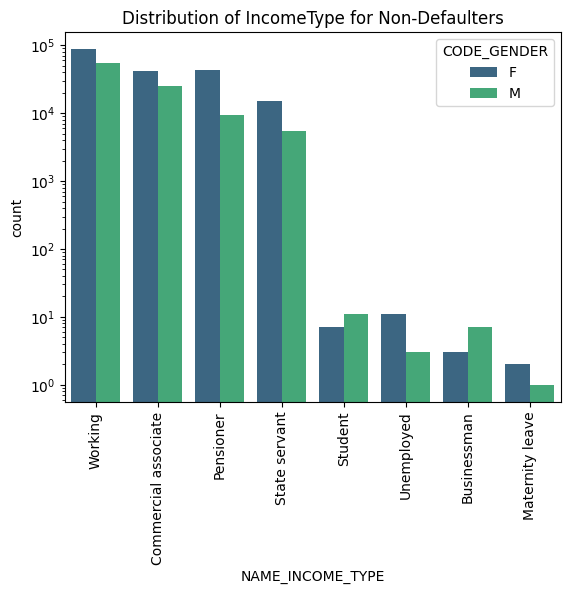

In [19]:
# 2. NAME_INCOME_TYPE : What is the type of Client's income which is one of the good factors to consider to check
# his/her ability towards loan repayment.

plt.xticks(rotation=90)
categorical_univariate_countplot(non_defaulter_target0, column='NAME_INCOME_TYPE', title='Distribution of Income'
                                                                                         'Type for Non-Defaulters',
                                 hue='CODE_GENDER', palette='viridis')

Conclusion drawn from above graph:

1. People with Income type -'Working', 'Commercial associate', 'State Servant' and 'Pensioner' are more likely to take 
up credits.
2. Females are having more number of credits than male.
3. Less number of credits for income type 'Unemployed' 'Student', 'Businessman' and 'Maternity leave'.

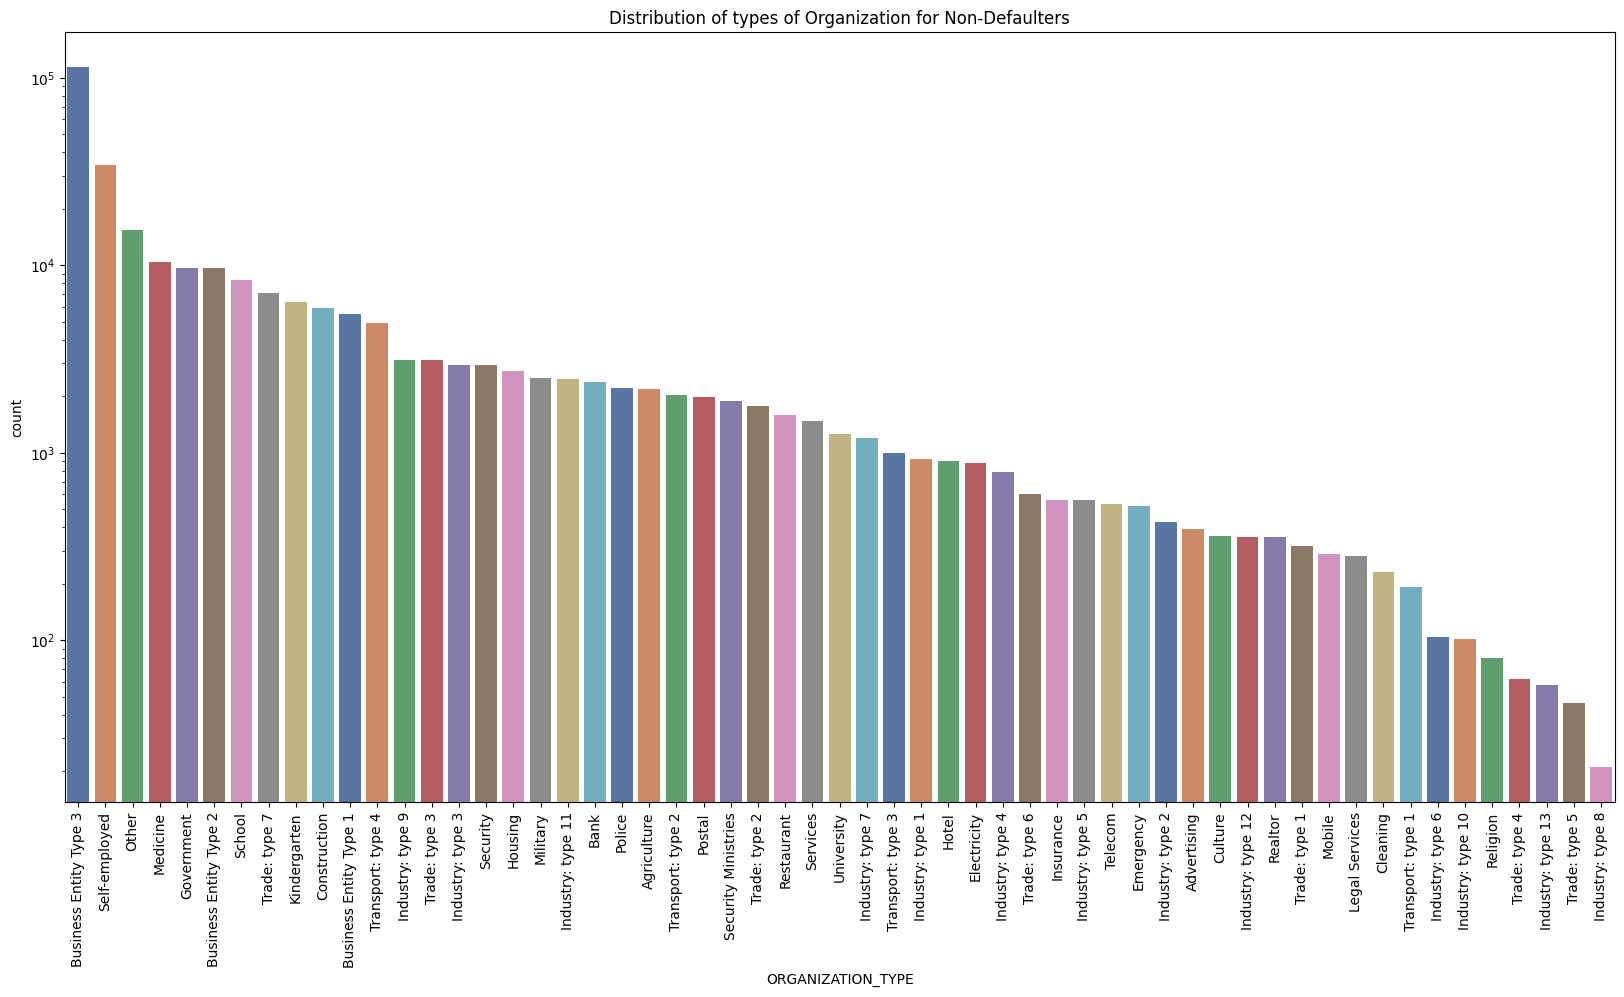

In [20]:
# 3. ORGANIZATION_TYPE:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
categorical_univariate_countplot(non_defaulter_target0, column='ORGANIZATION_TYPE', title='Distribution of types of '
                                                            'Organization for Non-Defaulters',palette='deep')

Conclusion drawn from above graph:

1. Clients which have applied for loans are from organization types- 'Business entity Type 3',
'Self employed', 'Other' , 'Medicine' and 'Government'.
2. Less clients are from Industry type 8,Trade type 5..

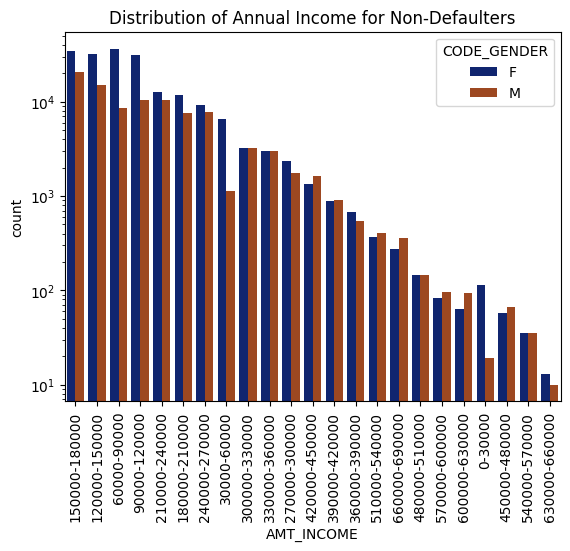

In [21]:
# 4. AMT_INCOME_TOTAL:

# Binning: Let's categorise the income into different bins and see which category is more likely to have credits.

bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000, 270000, 300000, 330000, 360000, 390000, 420000,
        450000, 480000, 510000, 540000, 570000, 600000, 630000, 660000, 690000]
labels = ['0-30000', '30000-60000', '60000-90000', '90000-120000', '120000-150000', '150000-180000', '180000-210000',
          '210000-240000', '240000-270000', '270000-300000', '300000-330000', '330000-360000', '360000-390000',
          '390000-420000', '420000-450000', '450000-480000', '480000-510000', '510000-540000', '540000-570000',
          '570000-600000', '600000-630000', '630000-660000', '660000-690000']


non_defaulter_target0['AMT_INCOME'] = pd.cut(non_defaulter_target0['AMT_INCOME_TOTAL'], bins, labels=labels)

plt.xticks(rotation=90)
categorical_univariate_countplot(non_defaulter_target0, column='AMT_INCOME',
                                 title='Distribution of Annual Income for Non-Defaulters', hue='CODE_GENDER',
                                 palette='dark')

Conclusion drawn from above graph:

1. Income range from 60000 to 210000 is having more number of credits and Female are leading male for this range.
2. In general, Female counts are higher than male.

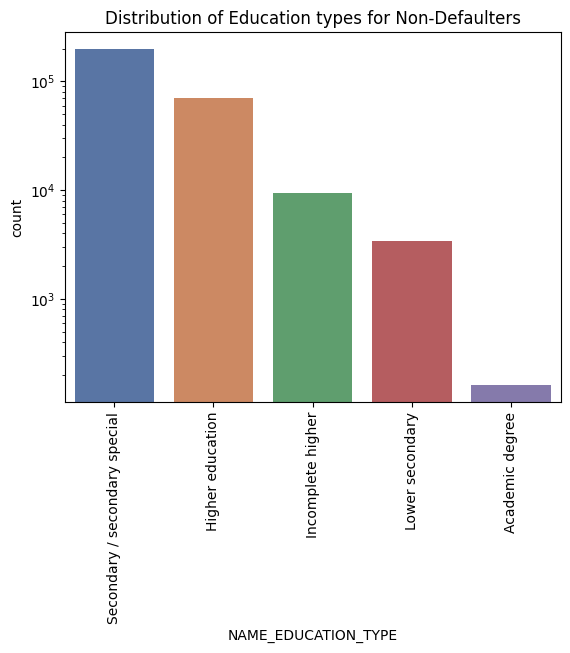

In [22]:
# 5. NAME_EDUCATION_TYPE:

plt.xticks(rotation=90)
categorical_univariate_countplot(non_defaulter_target0, column='NAME_EDUCATION_TYPE',
                                 title='Distribution of Education types for Non-Defaulters', palette='deep')

Conclusion drawn from above graph:

1. People with Secondary Special education are more inclined towards having credits.
2. Minimal with Academics Degree and Lower Secondary are having credits.

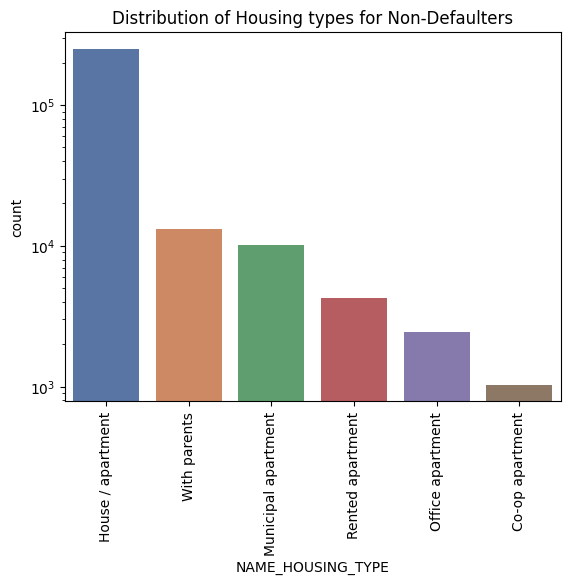

In [23]:
# 6. NAME_HOUSING_TYPE:
plt.xticks(rotation=90)
categorical_univariate_countplot(non_defaulter_target0, column='NAME_HOUSING_TYPE', title='Distribution of Housing '
                                                            'types for Non-Defaulters', palette='deep')

Conclusion drawn from above graph:

1. Maximum credits are for those who have their own house and apartments.

### Numerical Univariate Analysis & Identifying Outliers.

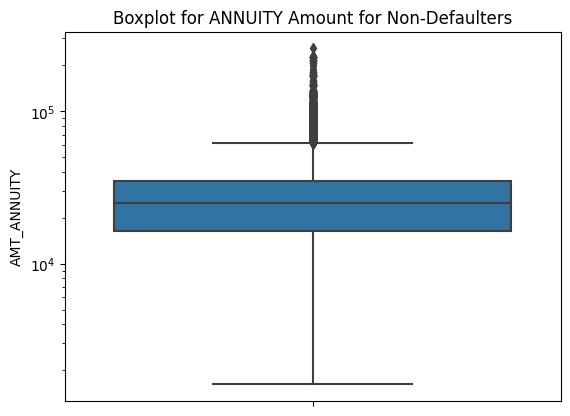

In [24]:
# 1. ANNUITY AMOUNT

numerical_univariate_boxplot(non_defaulter_target0, column='AMT_ANNUITY', title='Boxplot for ANNUITY Amount for '
                                                                                'Non-Defaulters')

Conclusion drawn from above graph:
1. There are many outliers in the Amount Annuity.
2. There is lot of difference could be seen in First quartile vs Third quartile.

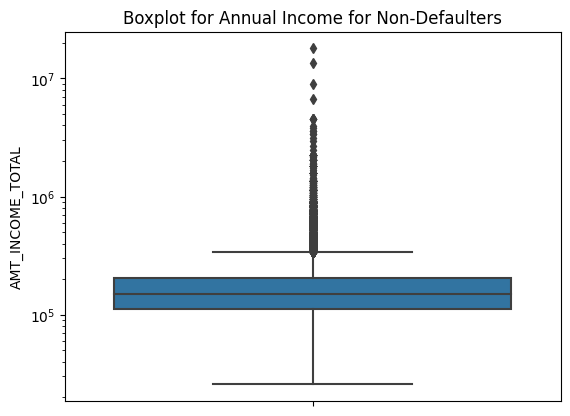

In [25]:
# 2. AMT_INCOME_TOTAL

numerical_univariate_boxplot(non_defaulter_target0, column='AMT_INCOME_TOTAL', title='Boxplot for Annual Income for '
                                                                                  'Non-Defaulters')

Conclusion drawn from above graph:
1. There are many outliers in the Total Income amount.
2. There is lot of difference could be seen in First quartile vs Third quartile.

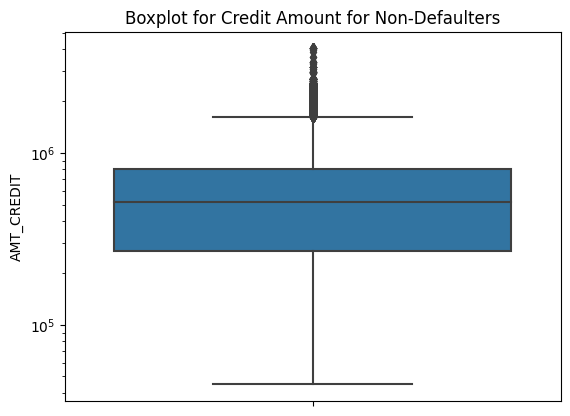

In [26]:
# 3. CREDIT AMOUNT.

numerical_univariate_boxplot(non_defaulter_target0, column='AMT_CREDIT', title='Boxplot for Credit Amount for Non-Defaulters')

Conclusion drawn from above graph:

1. Outliers are noticed in Credit Amount.
2. There is lot of difference could be seen in First quartile vs Third quartile.First quartile is bigger than third 
quartile.

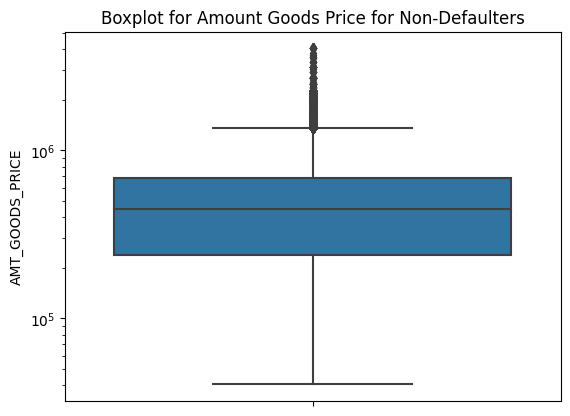

In [27]:
# 4.AMT_GOODS_PRICE

numerical_univariate_boxplot(non_defaulter_target0, column='AMT_GOODS_PRICE', title='Boxplot for Amount Goods Price for Non-Defaulters')


Conclusion drawn from above graph:

1. Outliers are noticed in Amount Goods Price.
2. There is lot of difference could be seen in First quartile vs Third quartile.First quartile is quite small than third 
quartile.

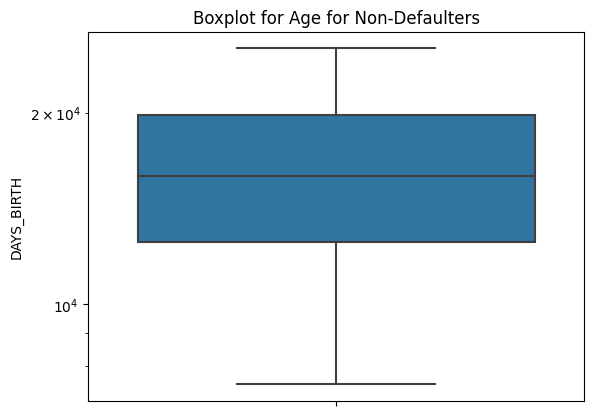

In [28]:
# 4.DAYS_BIRTH

numerical_univariate_boxplot(non_defaulter_target0, column='DAYS_BIRTH', title='Boxplot for Age for Non-Defaulters')


Conclusion drawn from above graph:

1. There are no outliers for Age. 

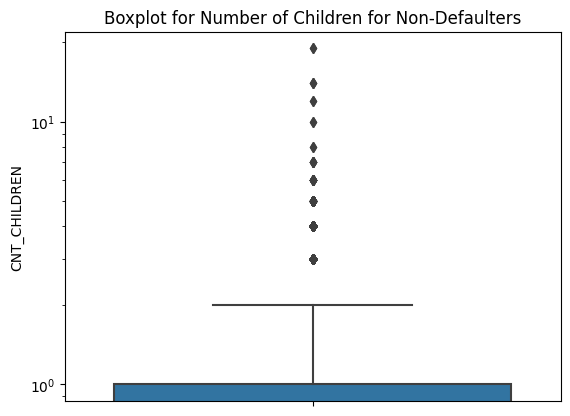

In [29]:
# 5. CNT_CHILDREN
numerical_univariate_boxplot(non_defaulter_target0, column='CNT_CHILDREN', title='Boxplot for Number of Children for Non-Defaulters')

Conclusion drawn from above graph:

1. There are few outliers for Count of Children. Also, can be observed from the value_counts or unique() method.


## Target=1, clients with payment difficulties/Defaulters.

### Categorical Univariate analysis

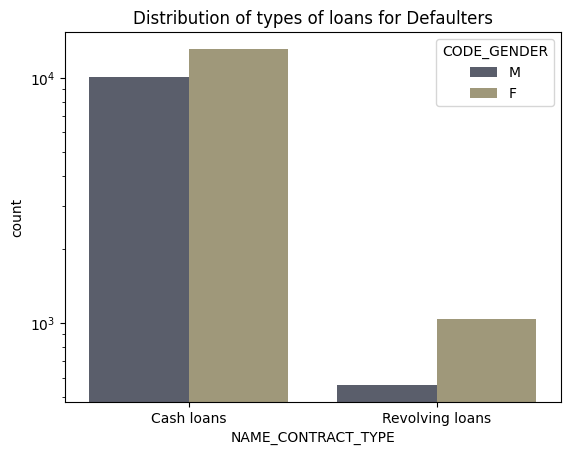

In [30]:
# 1. NAME_CONTRACT_TYPE: Types of loan.

categorical_univariate_countplot(defaulter_target1, column='NAME_CONTRACT_TYPE', title='Distribution of types of '
                                                                                       'loans for Defaulters',
                hue='CODE_GENDER')

Conclusion drawn from above graph:

1. Again the 'cash loans' are higher in number of credits than 'Revolving loans'.
2. Female are leading.

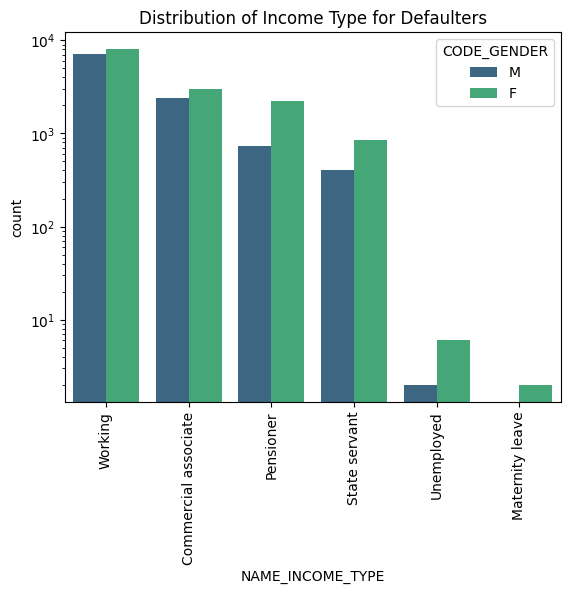

In [31]:
# 2. NAME_INCOME_TYPE :

plt.xticks(rotation=90)
categorical_univariate_countplot(defaulter_target1, column='NAME_INCOME_TYPE', title='Distribution of Income Type for '
                                                                                     'Defaulters',
hue='CODE_GENDER', palette='viridis')

Conclusion drawn from above graph:

1. For income type 'working', 'commercial associate',  the number of credits are maximum.
2. No credits for income type ‘Maternity leave’.
3. Females are having more credits than male.
4. When we compare this graph (Defaulters) with graph plotted for (Non-defaulters), Businessma, Students data is not 
present, means they didn't do any default or has difficulty in repayment of loans.

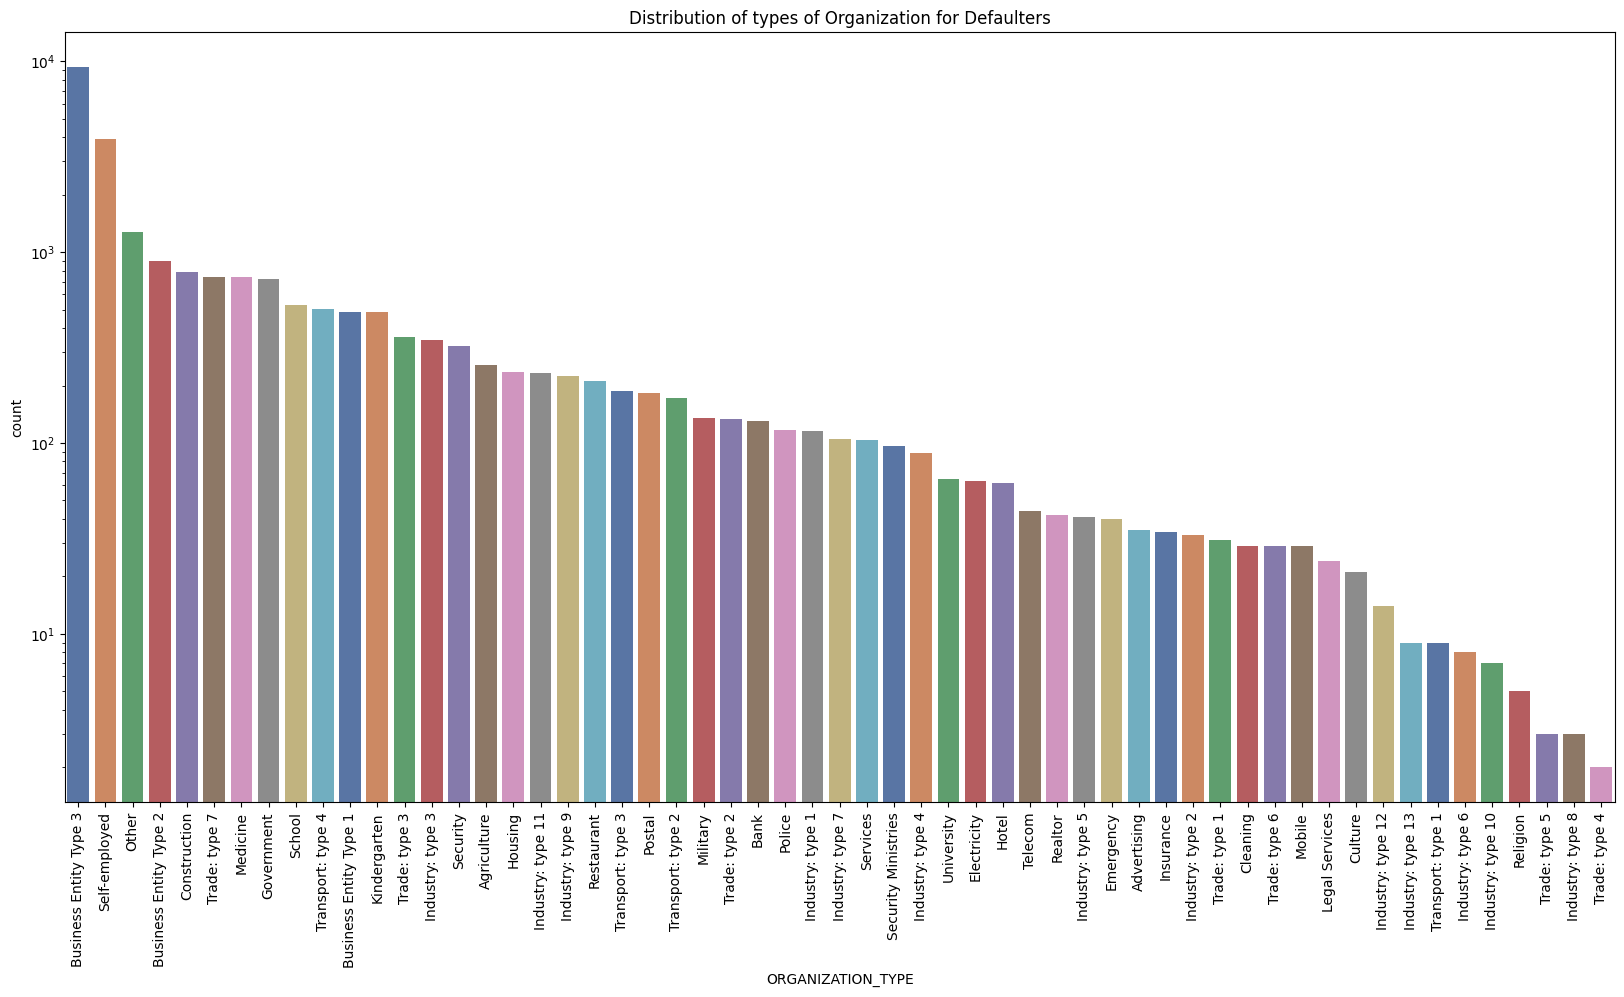

In [32]:
# 3. ORGANIZATION_TYPE:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
categorical_univariate_countplot(defaulter_target1, column='ORGANIZATION_TYPE',title='Distribution of types of '
                                                                                     'Organization for Defaulters',
                                 palette='deep')

Conclusion drawn from above graph:

1. Same as that of NonDefaulter Organization Type conclusions.

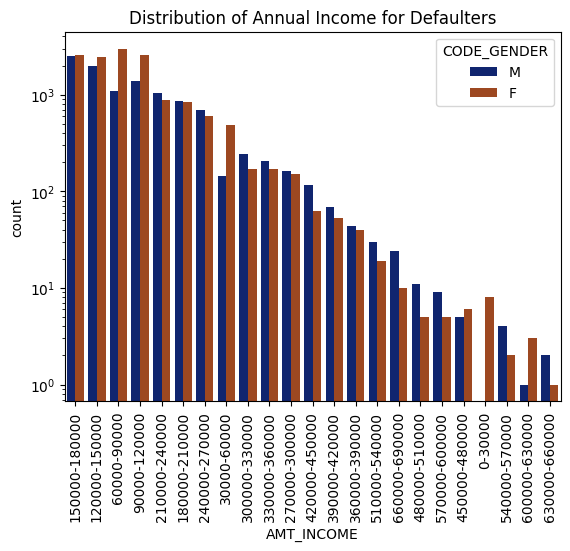

In [33]:
# 4. AMT_INCOME_TOTAL:

# Binning: Let's categorise the income into different bins and see which category is more likely to have credits.

bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000, 270000, 300000, 330000, 360000, 390000, 420000,
        450000, 480000, 510000, 540000, 570000, 600000, 630000, 660000, 690000]
labels = ['0-30000', '30000-60000', '60000-90000', '90000-120000', '120000-150000', '150000-180000', '180000-210000',
          '210000-240000', '240000-270000', '270000-300000', '300000-330000', '330000-360000', '360000-390000',
          '390000-420000', '420000-450000', '450000-480000', '480000-510000', '510000-540000', '540000-570000',
          '570000-600000', '600000-630000', '630000-660000', '660000-690000']

defaulter_target1['AMT_INCOME'] = pd.cut(defaulter_target1['AMT_INCOME_TOTAL'], bins, labels=labels)

plt.xticks(rotation=90)
categorical_univariate_countplot(defaulter_target1, column='AMT_INCOME', title='Distribution of Annual Income for '
                                                                               'Defaulters',hue='CODE_GENDER',
                                 palette='dark')

Conclusion drawn from above graph:

1. Income range from 90000 to 180000 is having more number of credits and Female are leading male for this range.
2. In general, Male counts are higher than female.

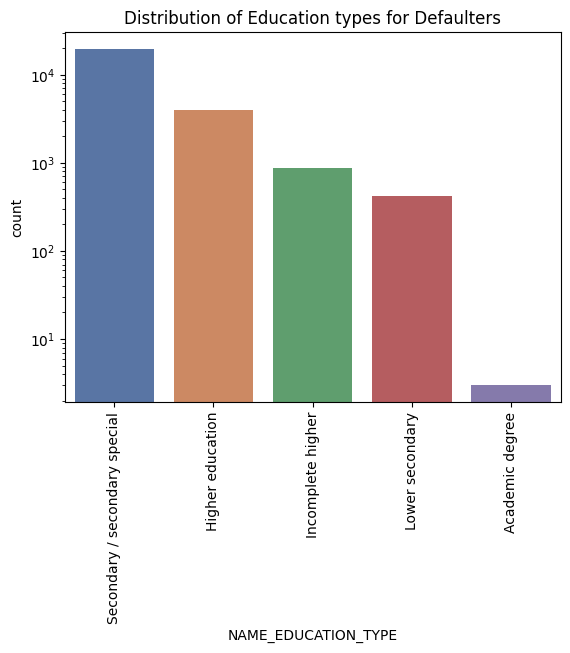

In [34]:
# 5. NAME_EDUCATION_TYPE:

plt.xticks(rotation=90)
categorical_univariate_countplot(defaulter_target1, column='NAME_EDUCATION_TYPE', title='Distribution of Education '
                                                                                        'types for Defaulters',
                            palette='deep')

Conclusion drawn from above graph:

1. People with Academics Degree are having less number of credits.
2. However for other types, everyone is having credits.

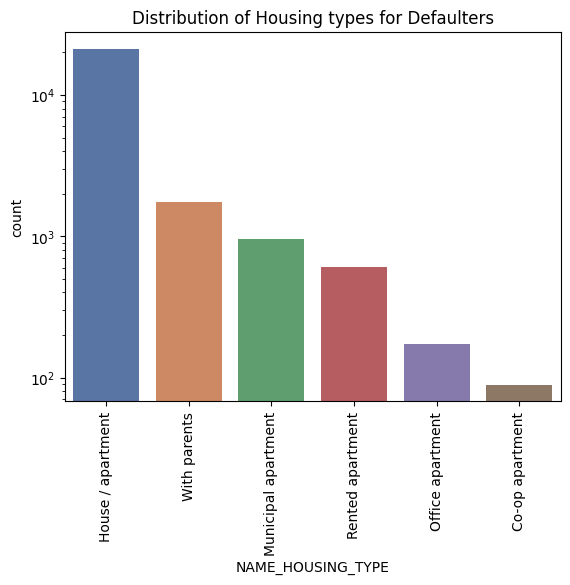

In [35]:
# 6. NAME_HOUSING_TYPE:

plt.xticks(rotation=90)
categorical_univariate_countplot(defaulter_target1, column='NAME_HOUSING_TYPE', title='Distribution of Housing types for Defaulters',
                            palette='deep')

Conclusion drawn from above graph:

1. Maximum credits are for those who have their own house and apartments.

### Numerical Univariate Analysis & Identifying Outliers.

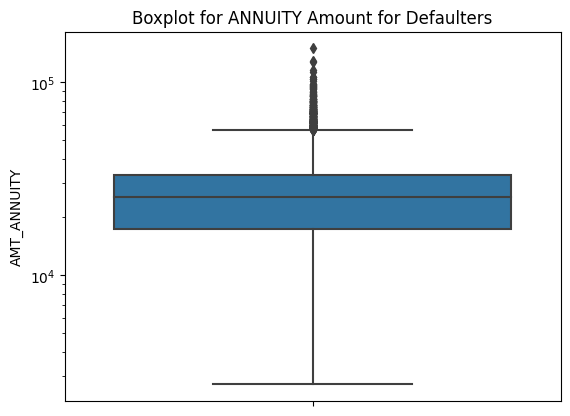

In [36]:
# 1. ANNUITY AMOUNT

numerical_univariate_boxplot(defaulter_target1, column='AMT_ANNUITY', title='Boxplot for ANNUITY Amount for Defaulters')

Conclusion drawn from above graph:
1. There are many outliers in the Amount Annuity.
2. There is lot of difference could be seen in First quartile vs Third quartile. The first quartile are bigger than 
third quartile.

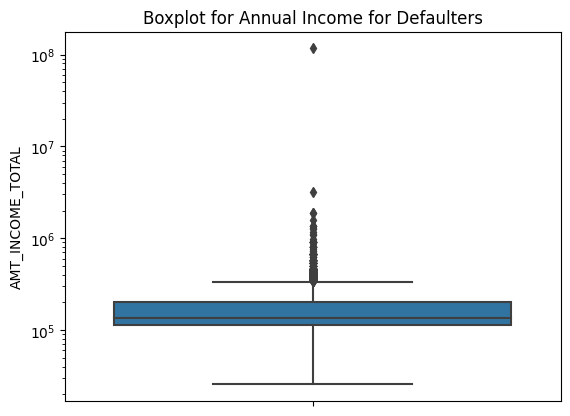

In [37]:
# 2. AMT_INCOME_TOTAL

numerical_univariate_boxplot(defaulter_target1, column='AMT_INCOME_TOTAL', title='Boxplot for Annual Income for Defaulters')

Conclusion drawn from above graph:
1. There are many outliers in the Total Income amount.
2. The first quartile is bigger than the third quartile which means most of the credits are present in 1st quartile.

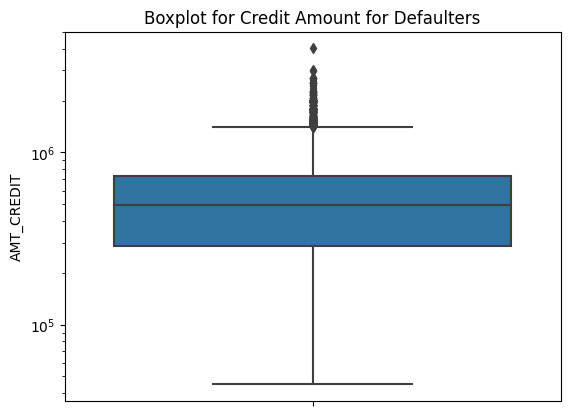

In [38]:
# 3. CREDIT AMOUNT.

numerical_univariate_boxplot(defaulter_target1, column='AMT_CREDIT', title='Boxplot for Credit Amount for Defaulters')

Conclusion drawn from above graph:

1. Outliers are noticed in Credit Amount.
2. There is lot of difference could be seen in First quartile vs Third quartile.First quartile is bigger than third 
quartile.

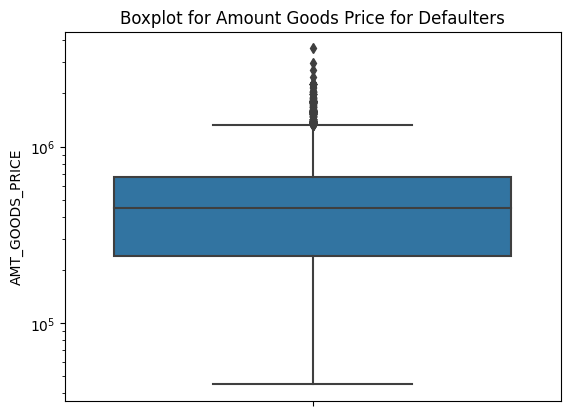

In [39]:
# 4.AMT_GOODS_PRICE

numerical_univariate_boxplot(defaulter_target1, column='AMT_GOODS_PRICE', title='Boxplot for Amount Goods Price for Defaulters')

Conclusion drawn from above graph:

1. Outliers are noticed in Amount Goods Price.
2. There is lot of difference could be seen in First quartile vs Third quartile.First quartile is quite small than third 
quartile.

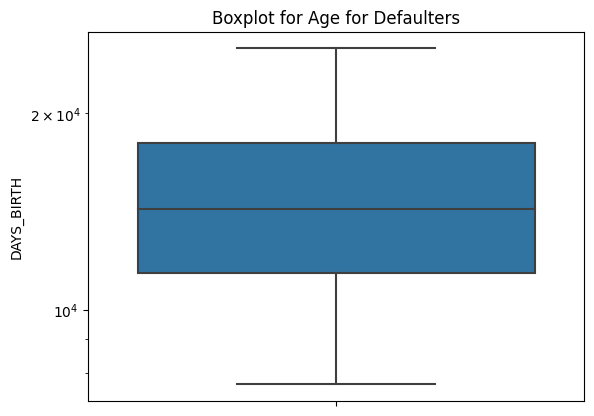

In [40]:
# 4.DAYS_BIRTH

numerical_univariate_boxplot(defaulter_target1, column='DAYS_BIRTH', title='Boxplot for Age for Defaulters')

Conclusion drawn from above graph:

1. There are no outliers for Age. 

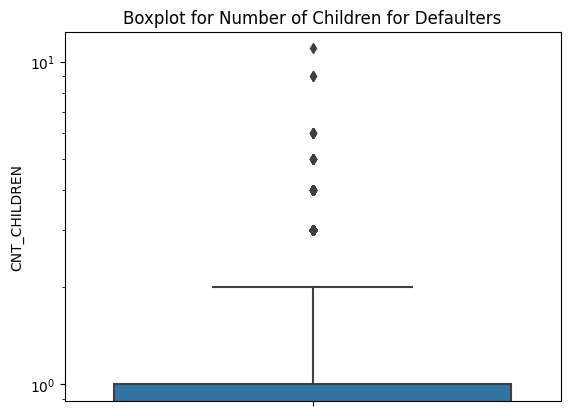

In [41]:
# 5. CNT_CHILDREN

numerical_univariate_boxplot(defaulter_target1, column='CNT_CHILDREN', title='Boxplot for Number of Children for Defaulters')

Conclusion drawn from above graph:

1. There are few outliers for Count of Children. Also, can be observed from the value_counts or unique() method.

## Target=0, clients with no payment difficulties.

### Bivariate Analysis

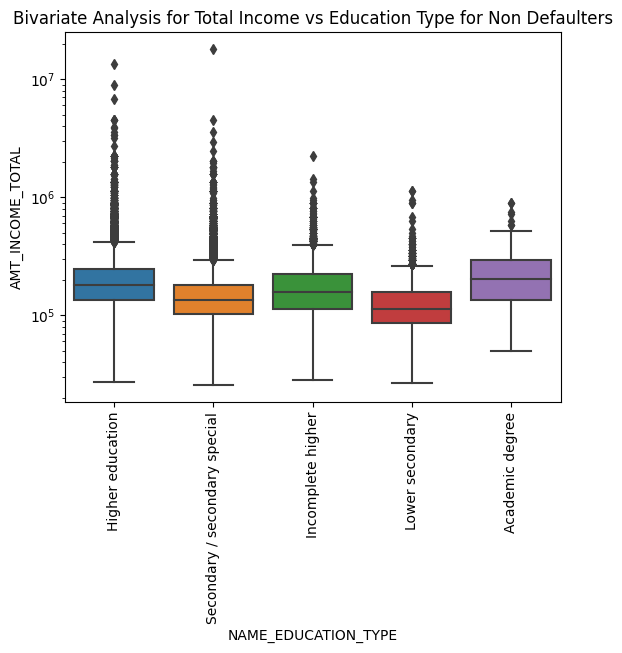

In [42]:
# 1. How ANNUAL TOTAL Income varies with Education type.
plt.xticks(rotation=90)
bivariate_boxplot(dataframe=non_defaulter_target0, column_x='NAME_EDUCATION_TYPE', column_y='AMT_INCOME_TOTAL',
                  title='Bivariate Analysis for Total Income vs Education Type for Non Defaulters')

Conclusion drawn from above graph:

1. For all Education types, their incomes are more in first quartile than third.
2. People wit Academic degree have more income than others.
3. People with Lower Secondary education have less income than others.
4. Outliers are present for all Education type.

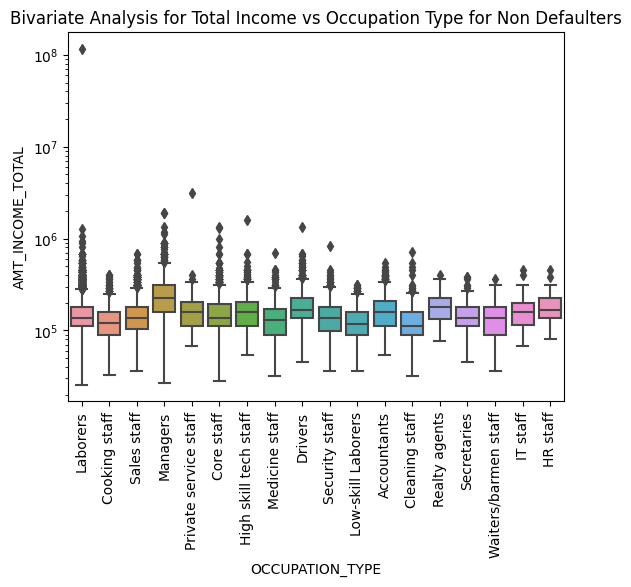

In [43]:
# 2. How ANNUAL TOTAL Income varies with OCCUPATION type.

bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_INCOME_TOTAL', column_x='OCCUPATION_TYPE',
                 title='Bivariate Analysis for Total Income vs Occupation Type for Non Defaulters')

Conclusion drawn from above graph:

1. Managers are having higher income than other.
2. Outliers are present for all Occupation types. Realty Agents, Barmen staff, have very less outliers.
3. Cleaning staff has less income.

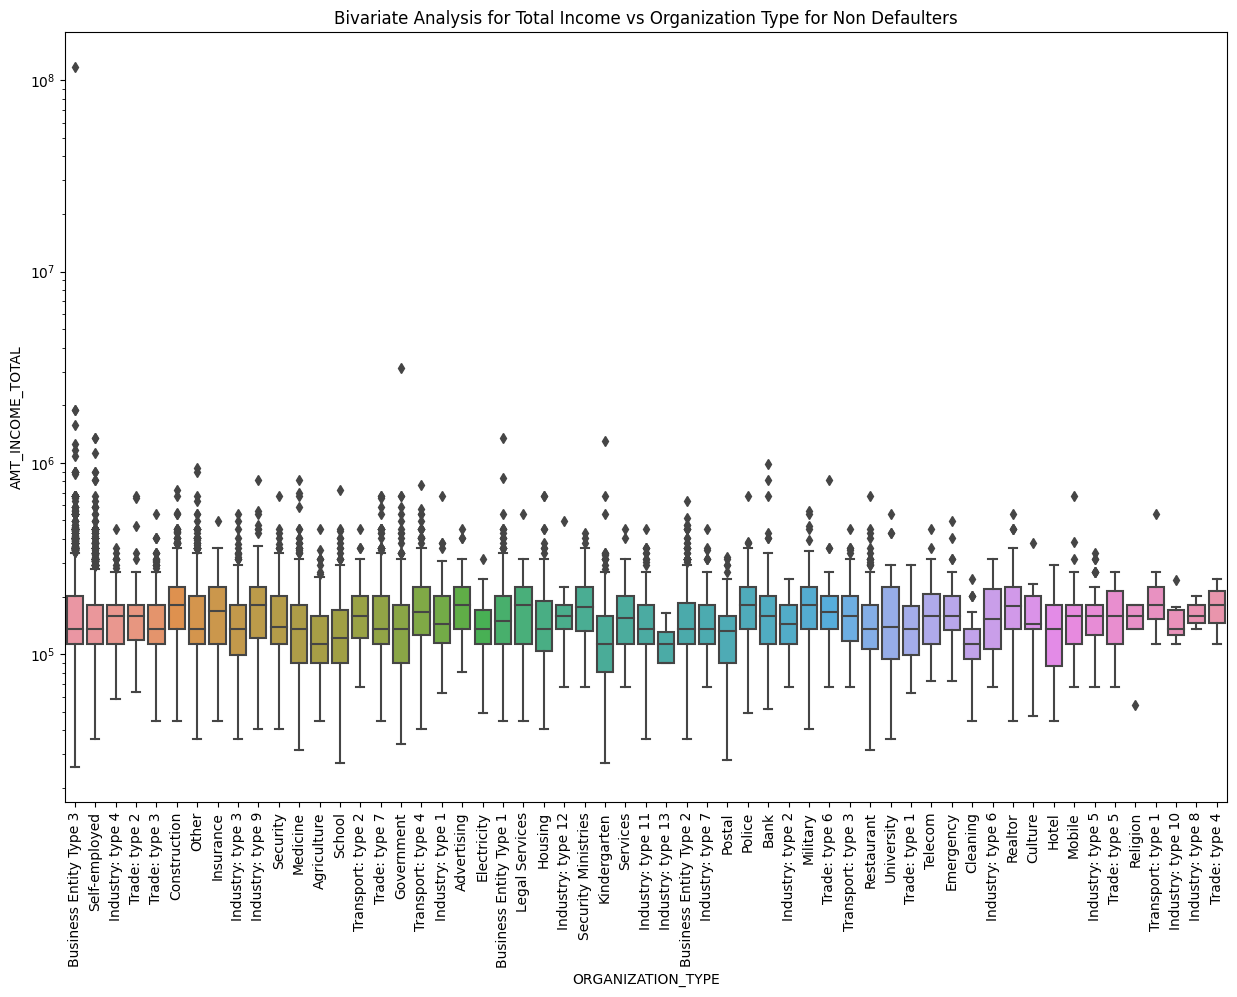

In [44]:
# 3. How ANNUAL TOTAL Income varies with Organization type.

plt.figure(figsize=(15,10))
bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_INCOME_TOTAL', column_x='ORGANIZATION_TYPE',
                      title='Bivariate Analysis for Total Income vs Organization Type for Non Defaulters')


Conclusion drawn from above graph:

1. Construction, Industry Type-9, Legal services,Advertising have more income amount than others.
2. Outliers are present for all Organization types except-Industry type-13, Industry Type-2, Industry Type-8, Trade Type-4,
 Religion.
3. Agriculture has minimum income.

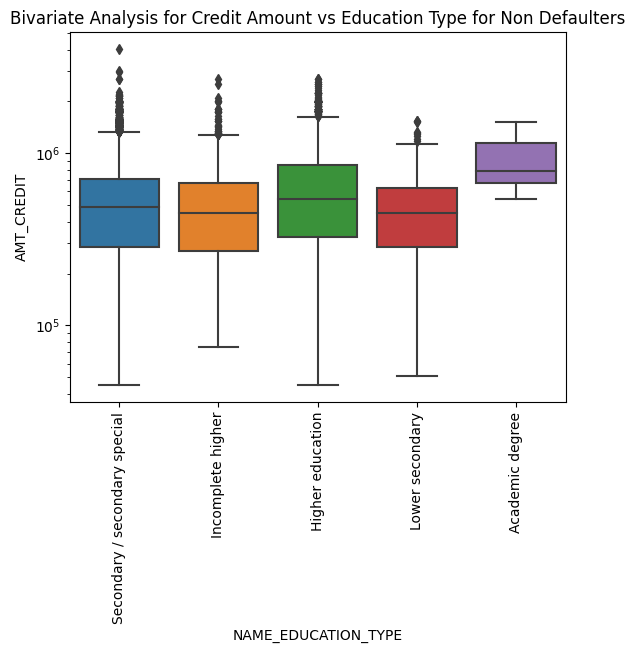

In [45]:
# 4. How Credit Amount varies with Education type.

bivariate_boxplot(dataframe=defaulter_target1, column_x='NAME_EDUCATION_TYPE', column_y='AMT_CREDIT',
                      title='Bivariate Analysis for Credit Amount vs Education Type for Non Defaulters')

Conclusion drawn from above graph:

1. For all Education types, their credits are more in first quartile than third except-Academics Degree.
2. People with Academics Degree have more credits than others.
3. People with Incomplete Higher and Lower Secondary education have less credits than others.
4. Academic degree doesn't contain any outliers while other all does.

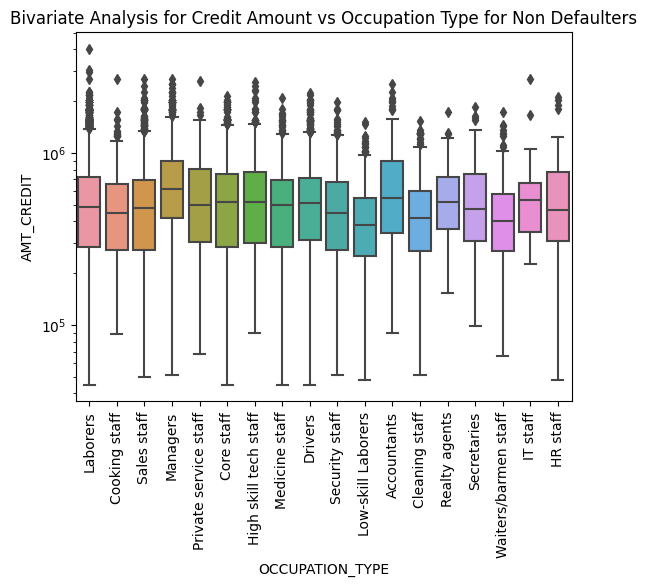

In [46]:
# 5. How Credit Amount varies with OCCUPATION type.

bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_CREDIT', column_x='OCCUPATION_TYPE',
                 title='Bivariate Analysis for Credit Amount vs Occupation Type for Non Defaulters')

Conclusion drawn from above graph:

1. Managers are having higher credits than other.
2. Outliers are present for all Occupation types. 
3. Low skill labourers has minimum credits.

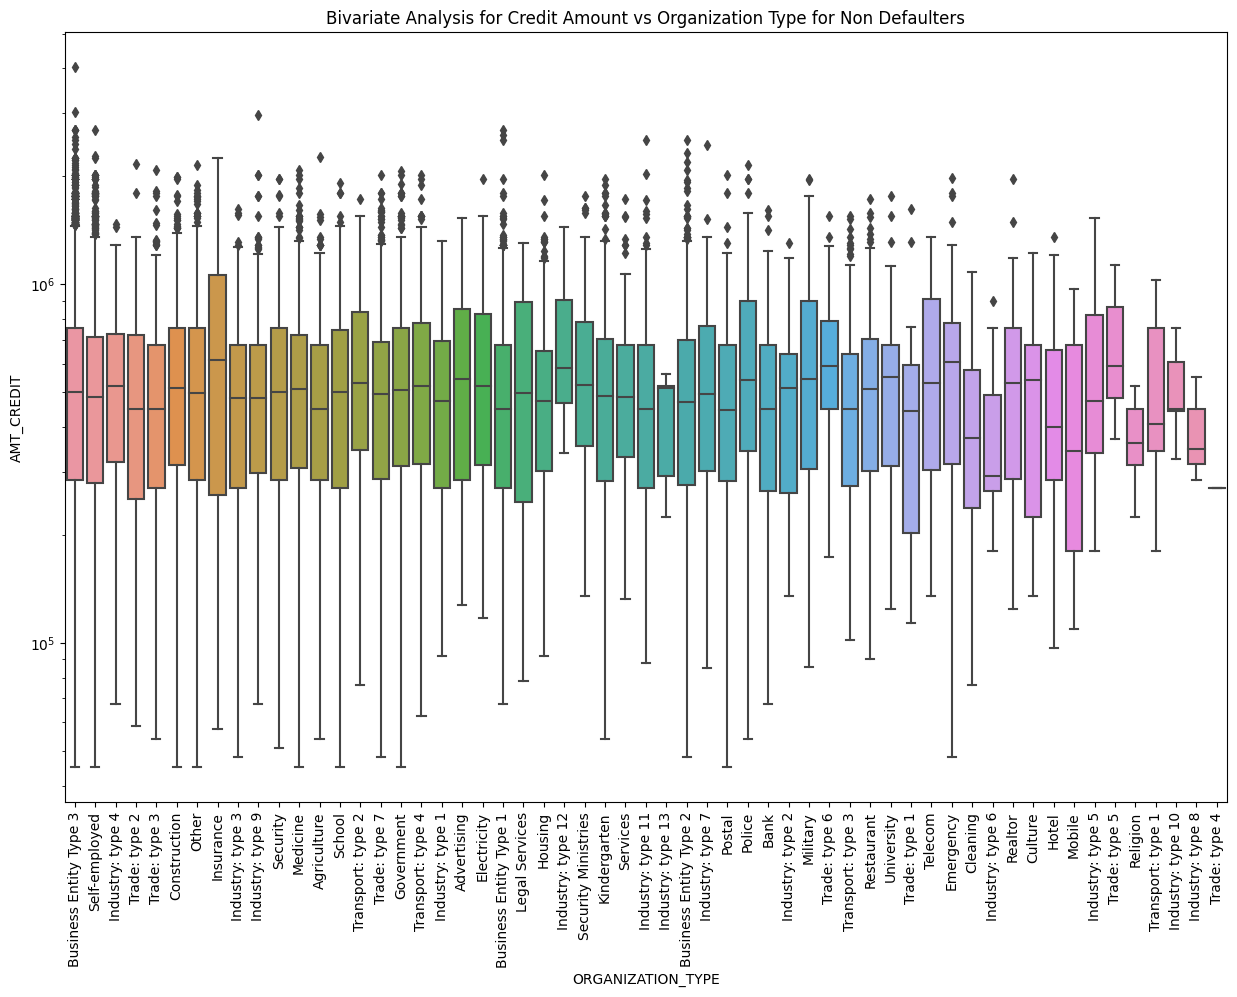

In [47]:
# 6. How Credit Amount varies with Organization type.

plt.figure(figsize=(15,10))
bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_CREDIT', column_x='ORGANIZATION_TYPE',
                      title='Bivariate Analysis for Credit Amount vs Organization Type for Non Defaulters')

Conclusion drawn from above graph:

1. Insurance have maximum credits others.
2. Industry Type 6 has minimum credits.

## Target=1, clients with payment difficulties.

### Bivariate Analysis

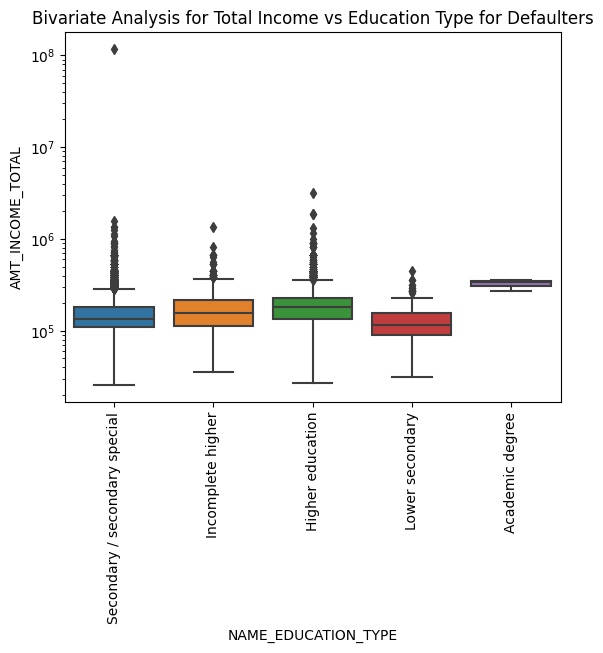

In [48]:
# 1. How ANNUAL TOTAL Income varies with Education type.

bivariate_boxplot(dataframe=defaulter_target1, column_x='NAME_EDUCATION_TYPE', column_y='AMT_INCOME_TOTAL',
                  title='Bivariate Analysis for Total Income vs Education Type for Defaulters')

Conclusion drawn from above graph:

1. For all Education types, their incomes are more in first quartile than third.
2. People wit Higher education have more income than others.
3. People with Lower Secondary education have less income than others.
4. Academic degree doesn't contain any outliers while other all does.

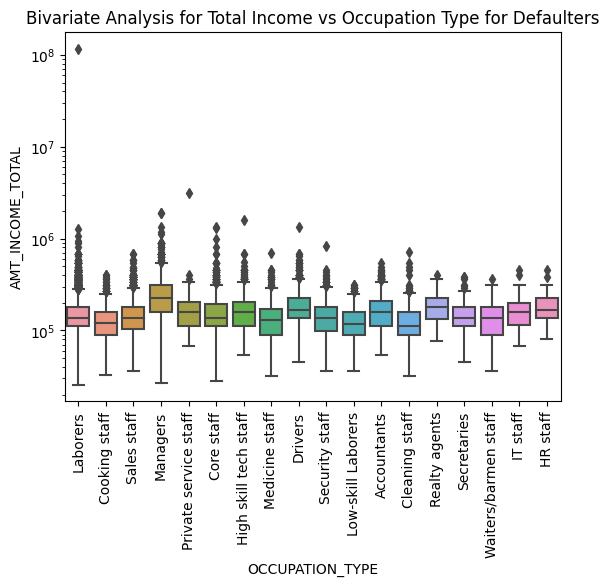

In [49]:
# 2. How ANNUAL TOTAL Income varies with OCCUPATION type.

bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_INCOME_TOTAL', column_x='OCCUPATION_TYPE',
                 title='Bivariate Analysis for Total Income vs Occupation Type for Defaulters')

Conclusion drawn from above graph:

1. Managers are having higher income than other.
2. Outliers are present for all Occupation types. Realty Agents, Barmen staff, IT staff ar having very less outliers.
3. Cleaning staff has less income.

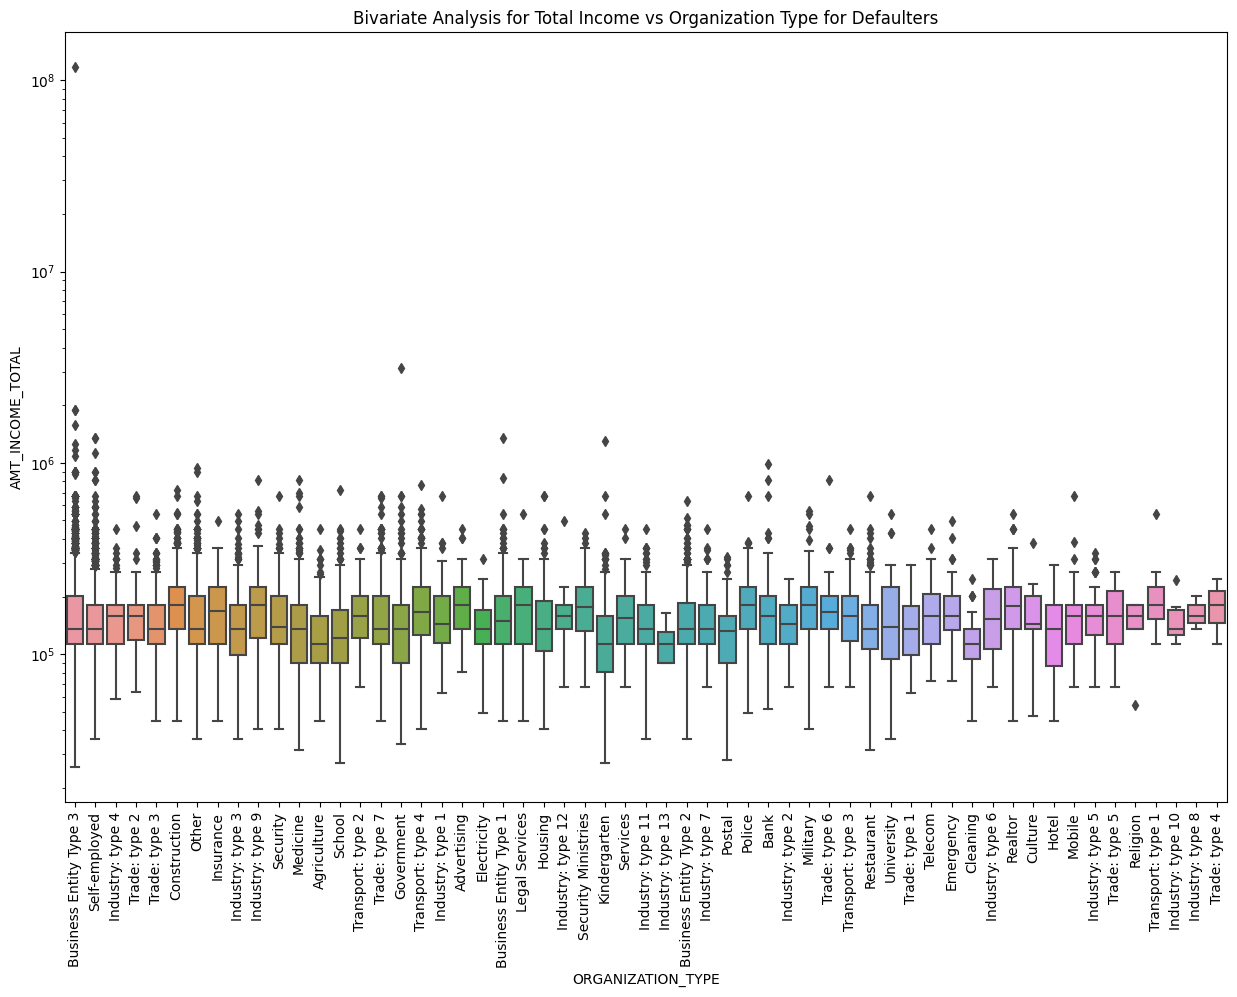

In [50]:
# 3. How ANNUAL TOTAL Income varies with Organization type.

plt.figure(figsize=(15,10))
bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_INCOME_TOTAL', column_x='ORGANIZATION_TYPE',
                      title='Bivariate Analysis for Total Income vs Organization Type for Defaulters')

Conclusion drawn from above graph:

1. Construction, Industry Type-9, Legal services, Security Ministery, Advertising have more income amount than others.
2. Outliers are present for all Organization types except-Trade type-4, Industry Type-8.
3. Agriculture, Kindergartner, Industry Type-13, Cleaning have almost similar incomes.

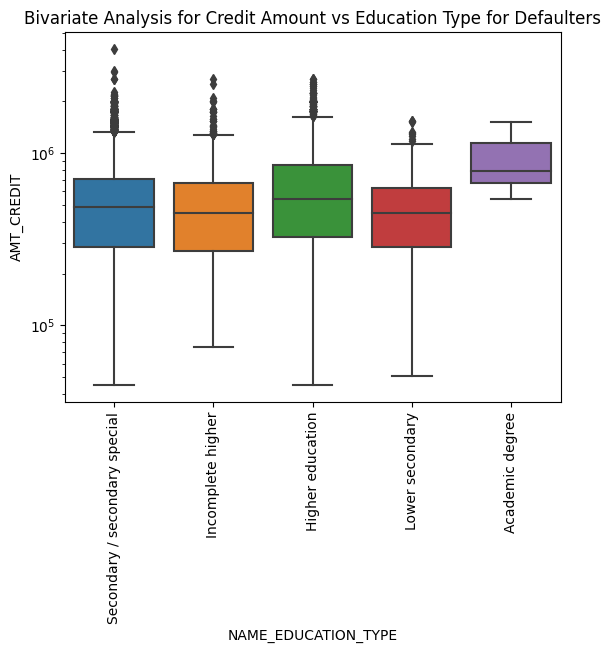

In [51]:
# 4. How Credit Amount varies with Education type.

bivariate_boxplot(dataframe=defaulter_target1, column_x='NAME_EDUCATION_TYPE', column_y='AMT_CREDIT',
                      title='Bivariate Analysis for Credit Amount vs Education Type for Defaulters')

Conclusion drawn from above graph:

1. For all Education types, their credits are more in first quartile than third except-Academics Degree.
2. People with Academics Degree have more credits than others.
3. People with Incomplete Higher and Lower Secondary education have less credits than others.
4. Academic degree doesn't contain any outliers while other all does.

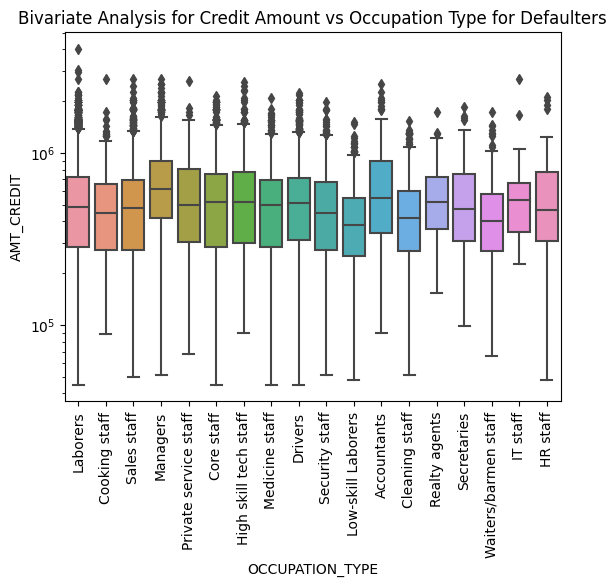

In [52]:
# 5. How Credit Amount varies with OCCUPATION type.

bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_CREDIT', column_x='OCCUPATION_TYPE',
                 title='Bivariate Analysis for Credit Amount vs Occupation Type for Defaulters')

Conclusion drawn from above graph:

1. Managers are having higher credits than other.
2. Outliers are present for all Occupation types. 
3. Low skill labourers has minimum credits.

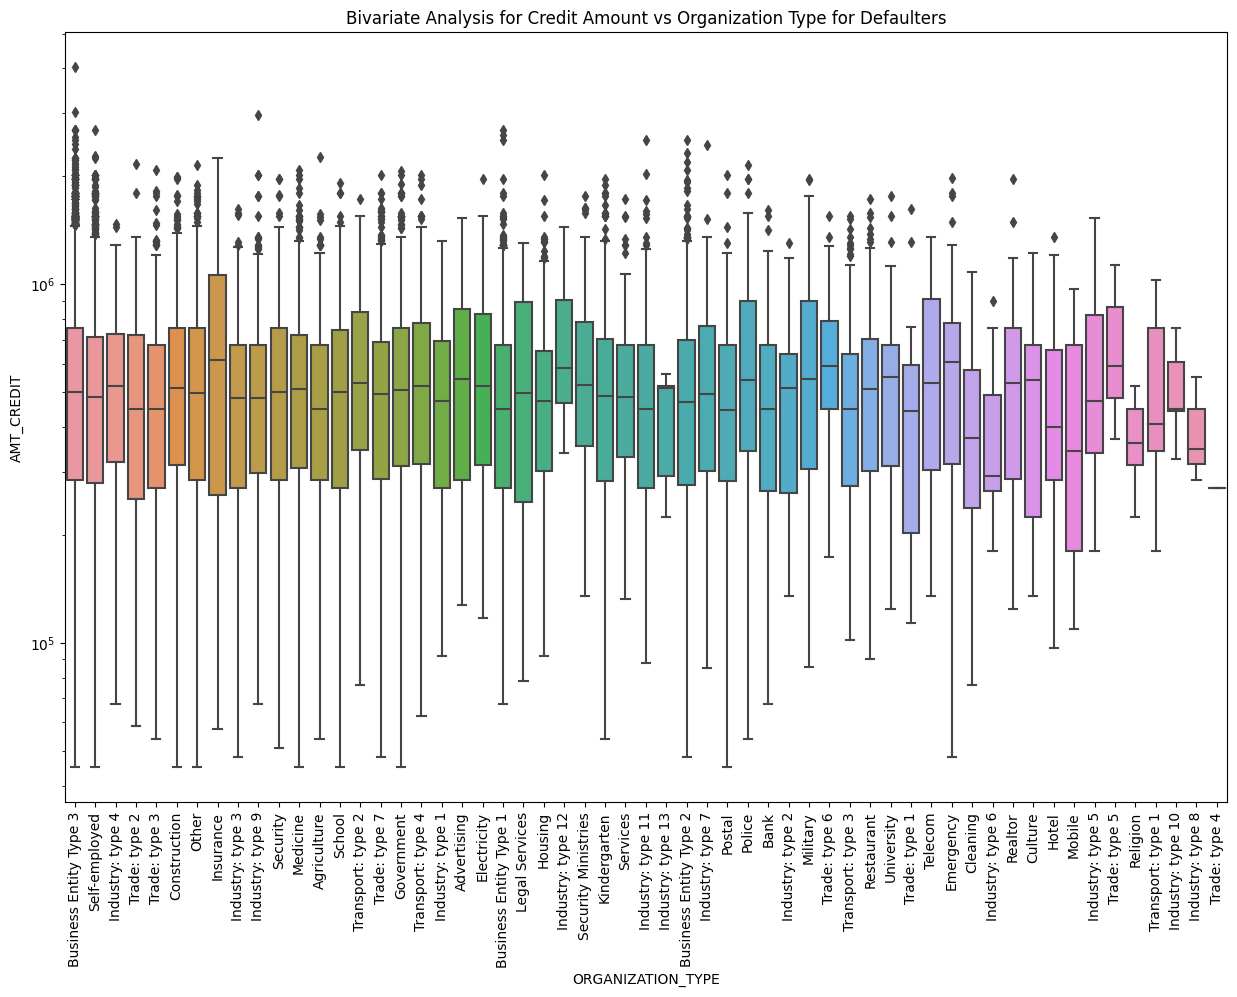

In [53]:
# 6. How Credit Amount varies with Organization type.

plt.figure(figsize=(15,10))
bivariate_boxplot(dataframe=defaulter_target1, column_y='AMT_CREDIT', column_x='ORGANIZATION_TYPE',
                      title='Bivariate Analysis for Credit Amount vs Organization Type for Defaulters')

Conclusion drawn from above graph:

1. Insurance have maximum credits others.
2. Industry Type 6 has minimum credits.

## Target=0, clients with no payment difficulties.

##  Correlation for Numerical Columns

In [54]:
non_defaulter_target0 = defaulter_target1.drop(['DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE'], axis=1)

target0 = non_defaulter_target0.iloc[0:, 2:21]
target0_corr = target0.corr(method='pearson')

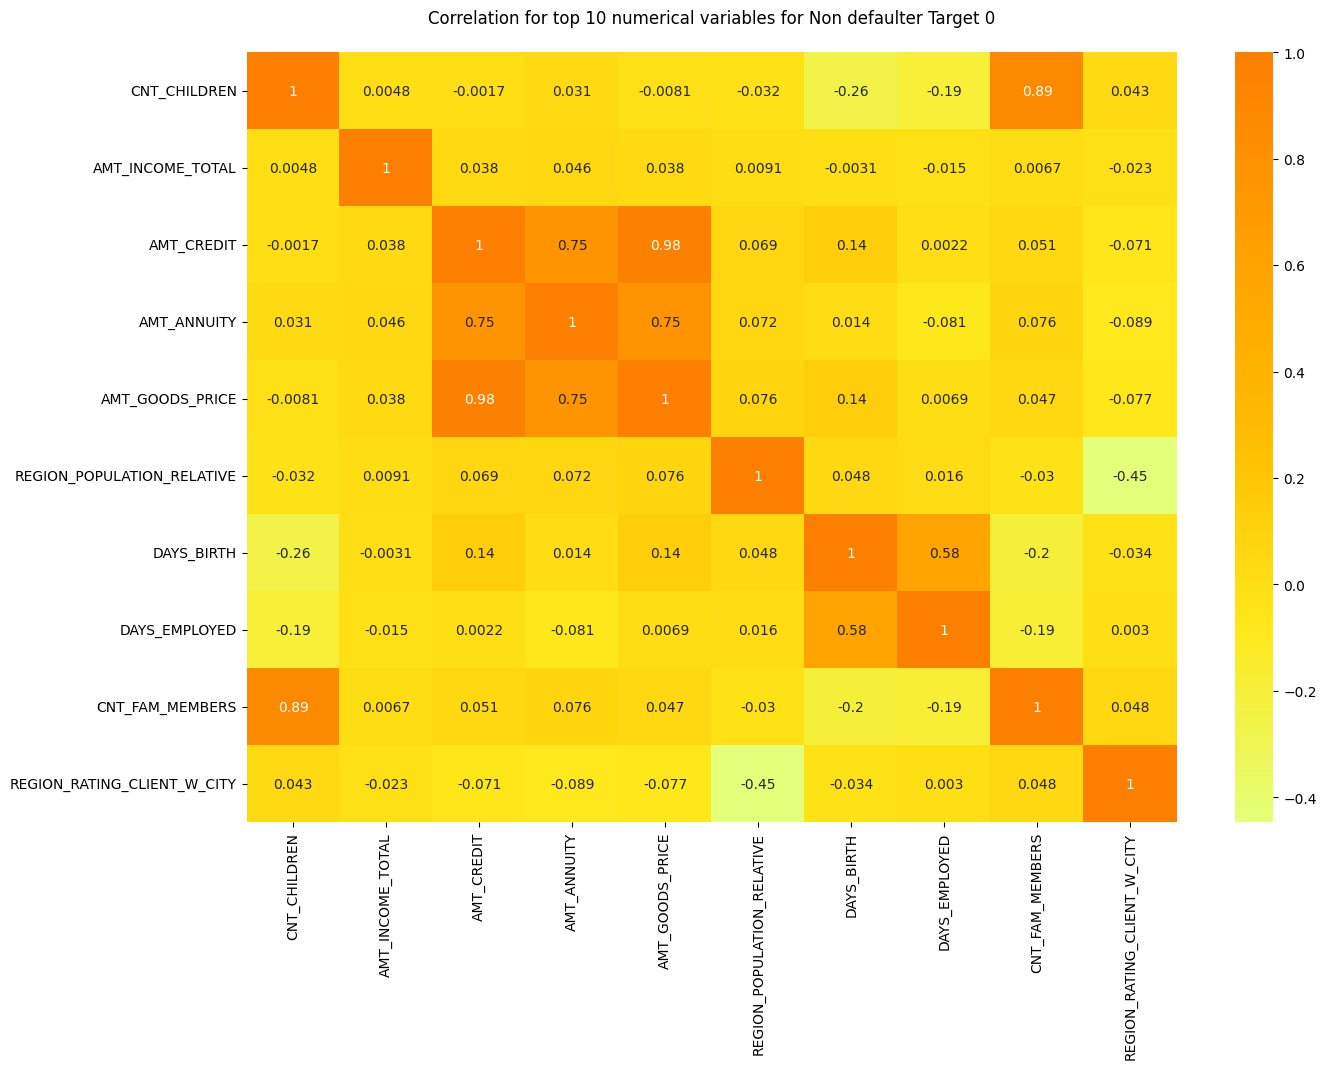

In [55]:
# Let's plot the top 10 numerical variables plot for Target 0, we are using Heatmap here. We could also use Pairplot
# but that would difficult to analyse as number of plots are many.

plt.figure(figsize=(15,10))
multivariate_heatmap(target0_corr, 'Wistia', 'Correlation for top 10 numerical variables for Non defaulter Target 0')

Conclusions from the above correlation heatmap: 

1. In densely populated area, number of children are less. It is inversely proportional. More densely populated, children count decreases and vice-versa.
2. Amount of Credit is linear with or proportional with Amount of Goods. 
3. Annual Income is inversely proportional to the age.
4. Amount of Annuity is having linear relationship with Amount of Credit.
5. Higher is your age, higher is your days employed.
6. Amount Credit amount is inversely proportional to the count of children. More is the number of children lesser is the Credit amount and vice-versa.
7. Higher is the count of family members, higher is the number of children in the family.

## Target=1, clients with payment difficulties.

## Correlation for Numerical Columns

In [56]:
defaulter_target1 = defaulter_target1.drop(['DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE'], axis=1)

target1 = defaulter_target1.iloc[0:, 2:21]
target1_corr = target1.corr(method='pearson')

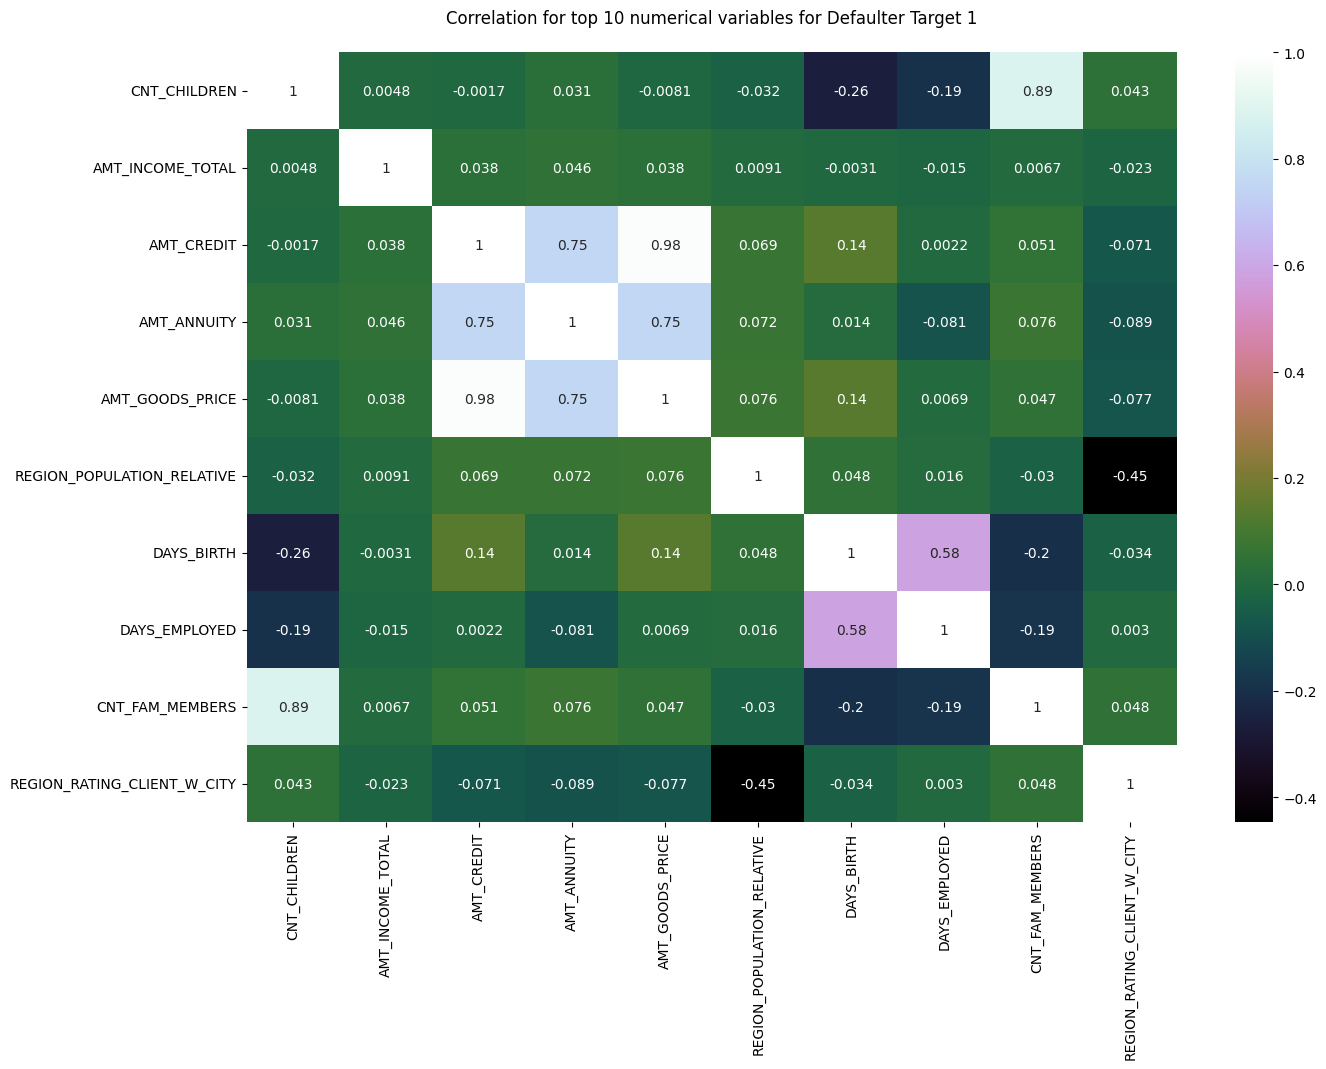

In [57]:
# Let's plot the top 10 numerical variables plot for Target 1, we are using Heatmap here. We could also use Pairplot
# but that would difficult to analyse as number of plots are many.

plt.figure(figsize=(15,10))
multivariate_heatmap(target0_corr, 'cubehelix', 'Correlation for top 10 numerical variables for Defaulter Target 1')

Conclusions from the above correlation heatmap: 

1. Client's social surroundings with observable 30 DPD (days past due) increases linearly wrt defaulted on 30 DPD (days past due).
2. Age is inversely proportional to family count.
3. In densely populated area, number of children are less. It is inversely proportional. More densely populated, children count decreases and vice-versa.
4. Annual Income is inversely proportional to the age.

### Previous_application.csv

In [58]:
# Loading the previous_application.csv.
previous_app = pd.read_csv("previous_application.csv")
print(previous_app.info())

# Printing all column names
print(previous_app.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Total columns count is 37. Rows count is 1670214.

Days past due is an important measure for lenders to assess the creditworthiness and risk associated with a borrower.

## Data Cleaning

1. Find out which all columns are having null/NaN values and if all these columns are not under analysis then drop them as they don't give any insight.
2. Drop the columns which are not relevant in this Credit EDA Case Study.

In [59]:
# Checking the percentage of missing values in each column.
print(round(previous_app.isnull().sum() * 100 / len(previous_app.index), 2).to_string())

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### There are columns with 99%, 53% 49%. First, let's drop all the columns having more than 40% of missing values as they are not of any use to us.


In [60]:
# Checking the columns having more than 40% missing values
columns_40_greater = previous_app.columns[
    100 * (previous_app.isnull().sum() / len(previous_app.index)) > 40]

# Dropping the columns which has more than 40% null values.
previous_app = previous_app.drop(columns_40_greater, axis=1)
print(previous_app.shape) 

# Checking the percentage of missing values in each column.
print(round(100 * previous_app.isnull().sum() / len(previous_app.index), 2).to_string())

(1670214, 26)
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02


***Let's check if there are any duplicated rows in the dataset.***

In [61]:
print(previous_app.duplicated().sum())

0


There are no duplicate rows in the dataset.

In [62]:
# Let's segregate on the basis of variable types. Categorical variable and Numerical/Continuous variable list.

categorical_vars = []
numerical_vars = []

for each in previous_app.columns:
    if previous_app[each].dtype == 'int64' or previous_app[each].dtype == 'float64':
        numerical_vars.append(each)
    elif previous_app[each].dtype == 'object':
        categorical_vars.append(each)

***For Categorical variable- imputing with mode (the most occurring value.***

***For Numerical variable- imputing with median (as this is not affected by outlier like mean).***

In [63]:
for each in categorical_vars:
    if previous_app[each].isnull().sum != 0:
        mode_each = previous_app[each].mode()[0]
        previous_app[each] = previous_app[each].fillna(mode_each)

for each in numerical_vars:
    if previous_app[each].isnull().sum != 0:
        median_each = previous_app[each].median()
        previous_app[each] = previous_app[each].fillna(median_each)

print(previous_app.isnull().sum())

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64


***Now check the percentage of XNA or XAP and take the decision whether it is safe to remove the entire column or we
should impute the value.***

In [64]:
# Created a list named remove_columns and added all columns which has XNA or XAP values which is nothing but
# missing values.

remove_columns = []
for each in previous_app.columns:
    if 'XNA' in previous_app[each].unique() or 'XAP' in previous_app[each].unique():
        remove_columns.append(each)

***Now depending on the percentage of XNA or XAP, we can check if we are okay to remove these columns or we should
impute the values with median in case of numerical column or with mode in case of Categorical column.***

In [65]:
# 1. NAME_CONTRACT_TYPE
print(100 * previous_app['NAME_CONTRACT_TYPE'].value_counts(normalize=True))

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


Percentage is very less 0.0002, we can impute the missing value with Others.

In [66]:
previous_app['NAME_CONTRACT_TYPE'] = previous_app['NAME_CONTRACT_TYPE'].apply(lambda x: 'Others' if x == 'XNA' else x)

print(previous_app['NAME_CONTRACT_TYPE'].unique()) 

['Consumer loans' 'Cash loans' 'Revolving loans' 'Others']


Successfully replaced with Others.

In [67]:
#2. NAME_CASH_LOAN_PURPOSE
print(100 * previous_app['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True))

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

Percentage is high. For XAP it is 55% and XNA it is 40%,and we would also need this column for our analysis, so we can
impute the missing value in this case with Other.

In [68]:
def f(x):
    if x in 'XNA' or x in 'XAP':
        return 'Other'
    else:
        return x

most_occurring = previous_app['NAME_CASH_LOAN_PURPOSE'].mode()[0]
previous_app['NAME_CASH_LOAN_PURPOSE'] = previous_app['NAME_CASH_LOAN_PURPOSE'].apply(f)

print(100 * previous_app['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True))

Other                               96.765265
Repairs                              1.422872
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                      0.008143
Hobby                                0.003293
Money for a third person          

Successfully replaced with Others.

In [69]:
# 3. NAME_PAYMENT_TYPE
print(100 * previous_app['NAME_PAYMENT_TYPE'].value_counts(normalize=True))

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


Percentage is  high. For XNA it is 37%, Good to drop this column.

In [70]:
previous_app = previous_app.drop('NAME_PAYMENT_TYPE', axis=1)

In [71]:
# 4. CODE_REJECT_REASON
print(100 * previous_app['CODE_REJECT_REASON'].value_counts(normalize=True))

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64


Percentage is  high. For XAP it is 81.013152 and XNA is less though 0.31%, but overall percentage is high so good to
drop.

In [72]:
previous_app = previous_app.drop('CODE_REJECT_REASON', axis=1)

In [73]:
# 5. NAME_CLIENT_TYPE

print(100 * previous_app['NAME_CLIENT_TYPE'].value_counts(normalize=True))

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


Percentage is very less 0.11, we can impute the missing value with Others.

In [74]:
previous_app['NAME_CLIENT_TYPE'] = previous_app['NAME_CLIENT_TYPE'].apply(lambda x: 'Others' if x == 'XNA' else x)

print(previous_app['NAME_CLIENT_TYPE'].unique())

['Repeater' 'New' 'Refreshed' 'Others']


Successfully replaced with Others.

In [75]:
print(previous_app.shape)

(1670214, 24)


Above 3 columns dropped successfully.

### Data Cleaning part is done. Now we can merge the previous_application dataframe with application dataframe.

***Using Inner join to merge these frames. Using this type of join, only the rows which are present in both framesare included.***

In [76]:
merged_data = pd.merge(left=application_data, right=previous_app, on='SK_ID_CURR', how='inner')

print(merged_data.shape) 

(1413597, 54)


In [77]:
# Now remove columns which are not needed further for analysis. Also, rename the columns which are common in both and
# for which suffix are added.

# Removing unwanted columns for analysis

merged_data.drop(['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_OWN_CAR',
                  'FLAG_OWN_REALTY', 'FLAG_DOCUMENTS', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
                  'DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                  'FLAG_CONT_MOBILE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
                  'NAME_PORTFOLIO', 'NAME_YIELD_GROUP', 'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION'], axis=1,
                 inplace=True)

print(merged_data.shape)

(1413597, 33)


In [78]:
# Renaming the column names after merging.

merged_data = merged_data.rename(
    {'NAME_CONTRACT_TYPE_x': 'NAME_CONTRACT_TYPE', 'AMT_CREDIT_x': 'AMT_CREDIT', 'AMT_ANNUITY_x': 'AMT_ANNUITY',
     'NAME_CONTRACT_TYPE_y': 'NAME_CONTRACT_TYPE_PREV', 'AMT_GOODS_PRICE_x': 'AMT_GOODS_PRICE',
     'AMT_GOODS_PRICE_y': 'AMT_GOODS_PRICE_PREV',
     'AMT_CREDIT_y': 'AMT_CREDIT_PREV', 'AMT_ANNUITY_y': 'AMT_ANNUITY_PREV',
     'WEEKDAY_APPR_PROCESS_STARTx': 'WEEKDAY_APPR_PROCESS_START_PREV',
     'HOUR_APPR_PROCESS_STARTx': 'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


## Univariate Analysis

Look for different columns wrt Name Contract Status that tells us whether loan is Approved, Refused etc. for 
different categories.

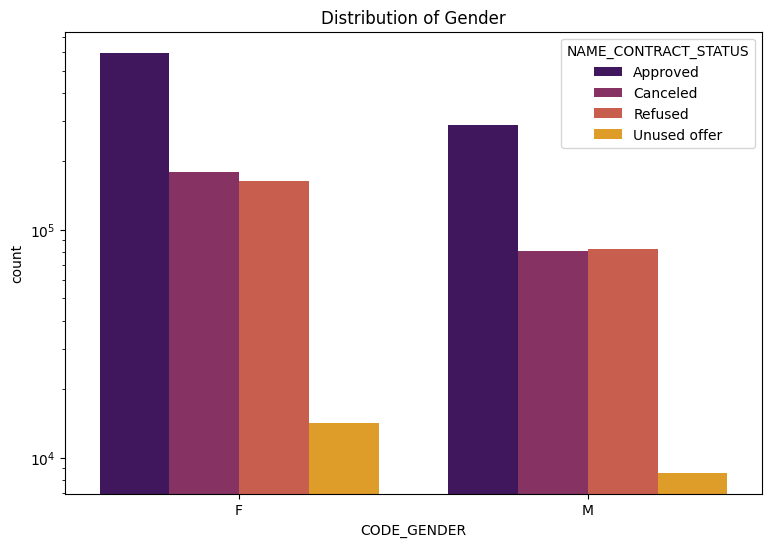

In [79]:
# 1. CODE_GENDER

plt.figure(figsize=(9, 6))
categorical_univariate_countplot(dataframe=merged_data, column='CODE_GENDER', title='Distribution of Gender',
                            hue='NAME_CONTRACT_STATUS',
                            palette='inferno')

Conclusion drawn from above graph:
1. Between Female and Male, approved loans are more for Female.
2. Females have more Cancelled loans than Refused.
3. Males have more Refused loans than Cancelled.
4. Overall Unused Offers are higher for females than males.

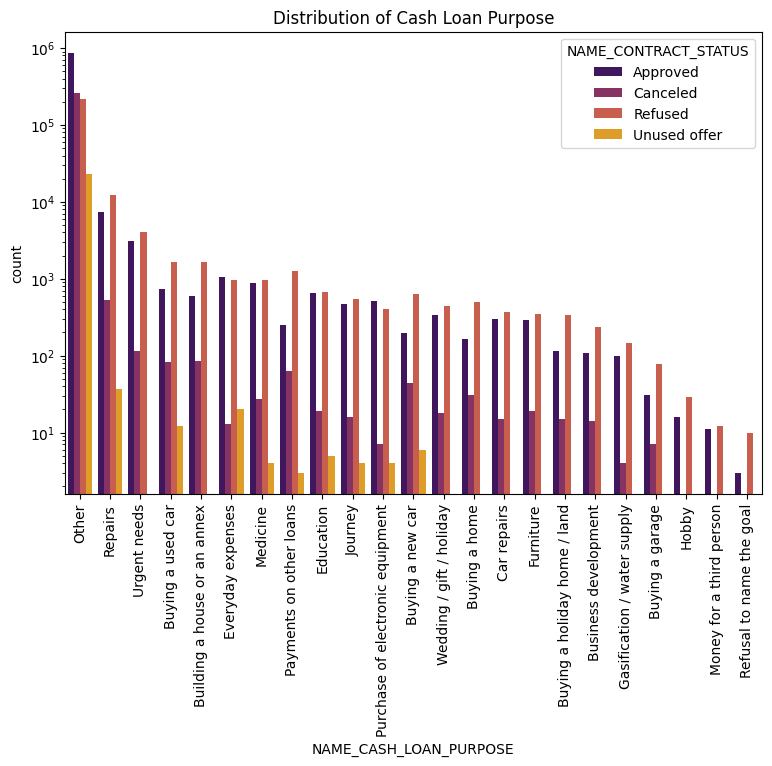

In [80]:
# 2. CASH_LOAN_PURPOSE:

plt.figure(figsize=(9, 6))
plt.xticks(rotation=90)
categorical_univariate_countplot(dataframe=merged_data, column='NAME_CASH_LOAN_PURPOSE', title='Distribution of Cash '
                                                                                          'Loan Purpose',
                            hue='NAME_CONTRACT_STATUS',
                            palette='inferno')

Conclusion drawn from above graph:
1. Maximum approved loans are for Others.
2. Most of loans are refused for the people who have 'Repairs' as their purpose.
3. Education as a purpose has almost equal number of Rejections and Approvals.
4. No offers are cancelled when purpose is Money for 3rd person, refusal to name the goal.
5. Buying a new car, buying a used car, buying a home or annex,Payments on other loans etc. are having more rejections 

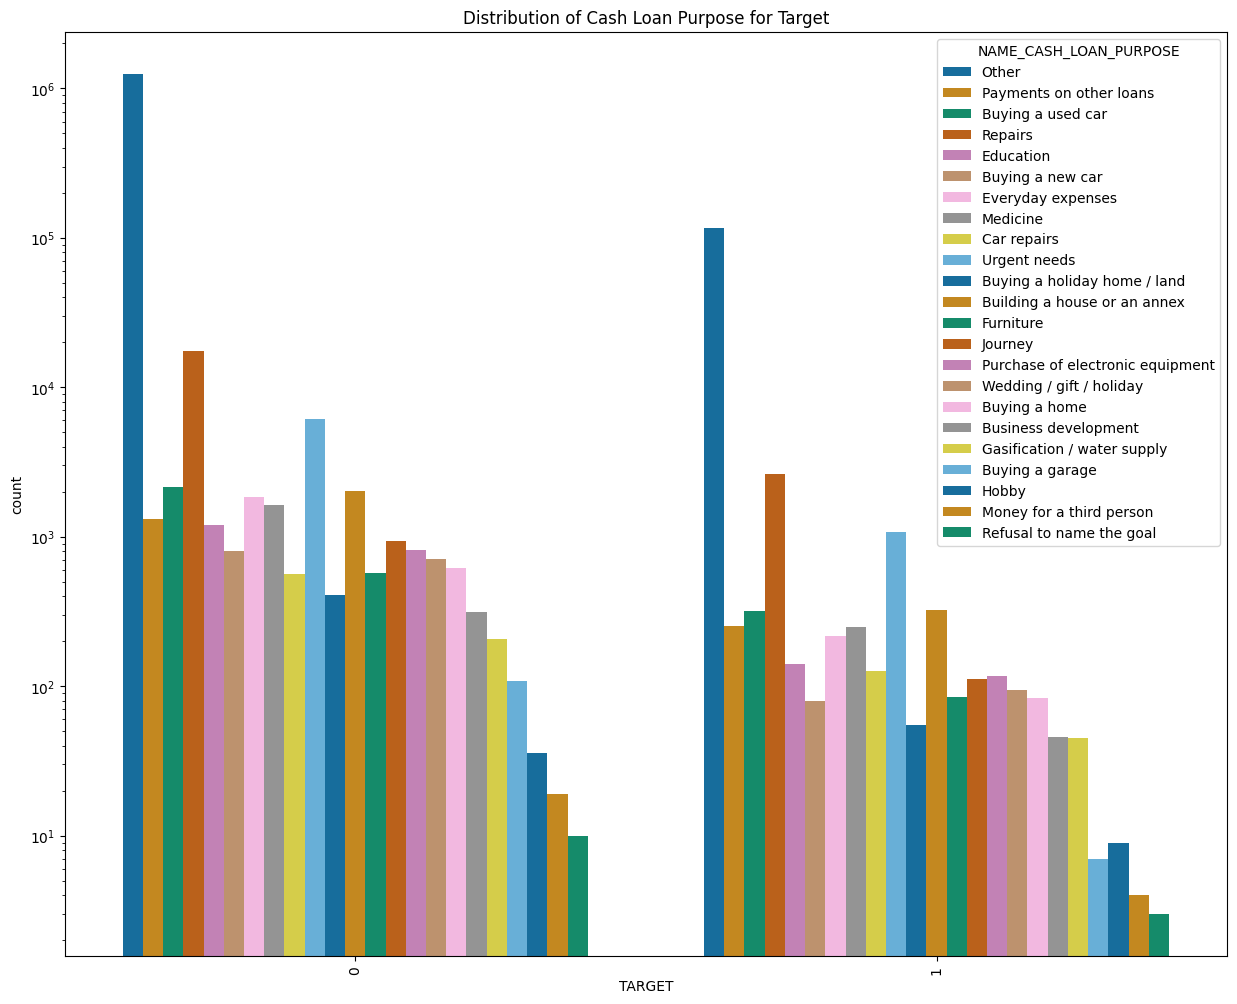

In [81]:
# 3. TARGET

plt.figure(figsize=(15, 12))
plt.xticks(rotation=90)
categorical_univariate_countplot(dataframe=merged_data, column='TARGET', title='Distribution of Cash Loan Purpose for Target',
                            hue='NAME_CASH_LOAN_PURPOSE',
                            palette='colorblind')

Conclusion drawn from above graph:
1. People taking loan for Purpose not clear and mentioned as Others are more likely to have Repayment difficulties.
2. Repairs have payment difficulty and not making payments on time.
3. Also, if we compare the purpose and it's repayment we could infer that- For Business development, Buying a garage,
Hobby, Money for third person all have more repayments than difficulty repaying.

## Bivariate Analysis.

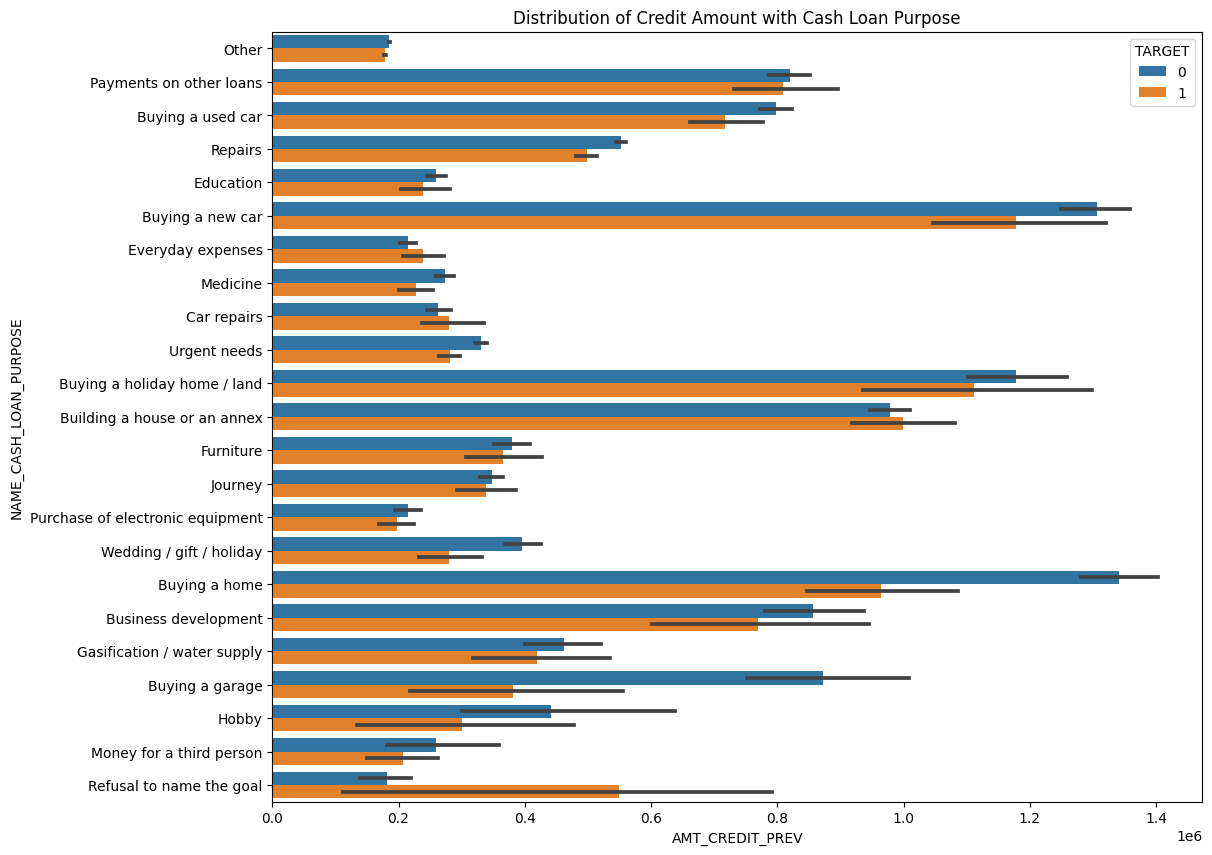

In [82]:
# 1. We can see relationship between different Cash Loan Purpose vs Amount of Credit taken for the same vs Repayment
# made on time or not.

plt.figure(figsize=(12,10))
bivariate_barplot(merged_data, 'AMT_CREDIT_PREV', 'NAME_CASH_LOAN_PURPOSE', title='Distribution of Credit Amount with '
                                                                                  'Cash Loan Purpose', hue='TARGET')


Conclusion drawn from above graph:
1. People taking loan for Purpose not clear and mentioned as Others are more likely to have Repayment difficulties.

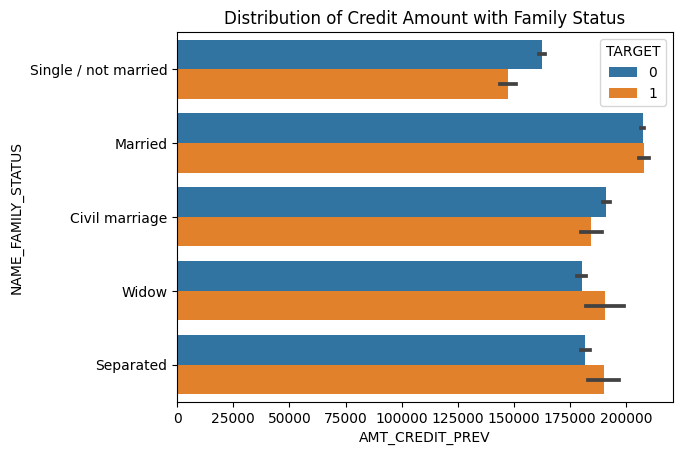

In [83]:
# 2. We can see relationship between different Family status vs Amount of Credit taken for the same vs Repayment
# made on time or not.

bivariate_barplot(merged_data, 'AMT_CREDIT_PREV', 'NAME_FAMILY_STATUS', title='Distribution of Credit Amount with '
                                                                              'Family Status', hue='TARGET')

Conclusion drawn from above graph:
1. Widows and Separated people have more difficulty repaying loan.
2. Married people have almost equal chances of repaying loan or doing default.
3. Repayment of loan by Single people are more than defaulting.

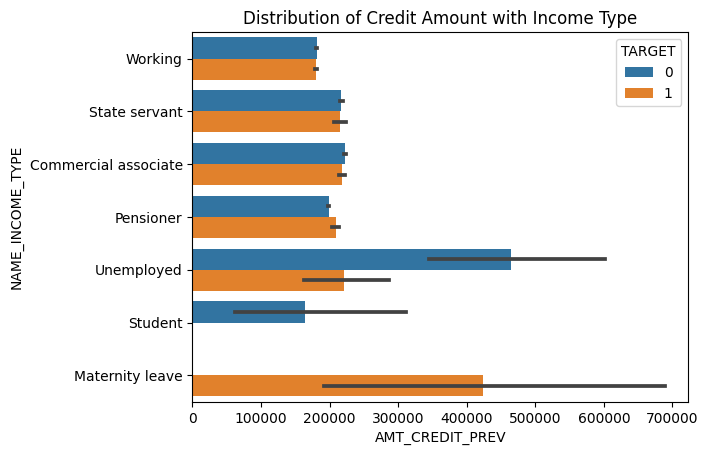

In [84]:
# 3. We can see relationship between different Income Type vs Amount of Credit taken for the same vs Repayment
# made on time or not.

bivariate_barplot(merged_data, 'AMT_CREDIT_PREV', 'NAME_INCOME_TYPE', title='Distribution of Credit Amount with '
                                                                            'Income Type', hue='TARGET')

Conclusion drawn from above graph:
1. Students are paying loans on time. There are no defaulters.
2. Those who are on Maternity leave are having difficulties repaying loan.

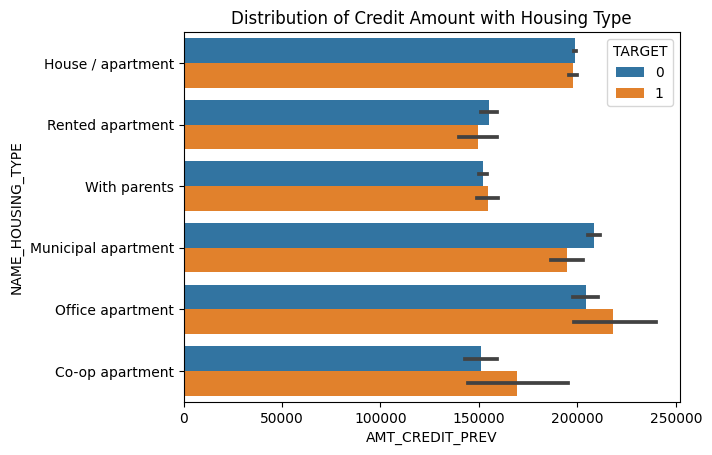

In [85]:
# 4. We can see relationship between different Housing Type vs Amount of Credit taken for the same vs Repayment
# made on time or not.

bivariate_barplot(merged_data, 'AMT_CREDIT_PREV', 'NAME_HOUSING_TYPE', title='Distribution of Credit Amount with '
                                                                             'Housing Type', hue='TARGET')

Conclusion drawn from above graph:
1. Those who have their own House/Apartments, Municipal Apartments are more likely to repay loan on time.
2. Those who are living in Office apartment, Co-op apartments are more likely have more difficulties repaying loan than
others.

# CONCLUSION:  Credit EDA Analysis 

1. People living in own House/Apartments, Municipal Apartments should be targeted for giving loans as they are more 
likely to make successful repay of loan when compared to Co-op apartments .

2. We should focus on giving loans to Students as there are no defaulters for this Income Type.

3. People taking loan for Purpose not clear, Repairs and mentioned as Others are more likely to have Repayment difficulties.

4. People with family status- Widows and Separated people have more difficulty repaying loan.